In [2]:
# Importing necessary libraries
import numpy as np  # NumPy library for numerical operations
import pandas as pd  # Pandas library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Function for Augmented Dickey-Fuller test
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs
from sklearn.metrics import mean_absolute_percentage_error


In [3]:
# Reading and initial processing of data
columns_to_load = ['PlantKey', 'Temperature', 'SunRad', 'Ratio', 'ValueTime']

# Read the Excel file with specified columns
data = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
data_mean = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#data = pd.read_csv("data/PrelData ExJobb - kopia(Blad2 (2)).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)


#data = pd.read_csv("data/PrelData ExJobb(Blad1).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#index_col='ValueTime'
data.dtypes
#print(data_mean.index.date)
pd.set_option('display.max_rows', None)

print(data_mean.groupby(data_mean.index.date)['Ratio'].mean())
print(data_mean.groupby(data_mean.index.date)['SunRad'].mean())
print(data_mean.groupby(data_mean.index.date)['Temperature'].mean())
ratio_mean= data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(ratio_mean)


# Group by the 'Date' and calculate the mean
# Since 'valuetime' is the index and assuming it is a datetime type index:
daily_mean_ratio = data.groupby(data.index.date)['Ratio'].mean()
daily_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean()
daily_mean_temperature = data.groupby(data.index.date)['Temperature'].mean()


data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(daily_mean_temperature)
#Plantkey temp sunrad ratio ValueTime


pd.set_option('display.max_colwidth', None)
data # Displaying the first few rows of the dataset





2023-01-01    134.371155
2023-01-02     69.980088
2023-01-03     37.854174
2023-01-04     14.873554
2023-01-05     18.552827
2023-01-06     24.104260
2023-01-07     37.782987
2023-01-08      8.664219
2023-01-09    165.512961
2023-01-10    189.569136
2023-01-11     16.534354
2023-01-12    156.427702
2023-01-13     71.202978
2023-01-14    136.156436
2023-01-15     98.455049
2023-01-16     78.500065
2023-01-17     11.766879
2023-01-18     71.329989
2023-01-19     80.282412
2023-01-20     74.267677
2023-01-21    105.056690
2023-01-22     84.890626
2023-01-23     38.360854
2023-01-24    105.073232
2023-01-25    111.119339
2023-01-26     78.127689
2023-01-27     78.805615
2023-01-28     87.140300
2023-01-29     85.879933
2023-01-30     79.013843
2023-01-31     72.560059
2023-02-01     50.581727
2023-02-02     20.204480
2023-02-03     27.728639
2023-02-04     29.950027
2023-02-05     33.355063
2023-02-06     31.754719
2023-02-07     99.553158
2023-02-08    100.572675
2023-02-09     87.696634


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [4]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [47]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [48]:
data


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [5]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply the function to your data
#cleaned_data = remove_outliers(data, 'Ratio')


data.describe()  # Describing the statistical aspects of data



def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to your data column
#outliers = find_outliers_iqr(data, 'Ratio')
#print(f"Number of outliers detected: {len(outliers)}")



def remove_negative_values(data, column):
   
    filtered_data = data[data[column] >= 0]
    return filtered_data


def remove_Positive_values(data, column):
    filtered_data = data[data[column] < 200]
    return filtered_data
data=remove_negative_values(data,"Ratio")
data=remove_Positive_values(data,"Ratio")


data.describe()


#print(data.groupby(data.index.date)['Ratio'].mean())

data_mean= data.groupby(data.index.date)['Ratio'].mean()
data_mean.to_csv('meandata/Ratio_data.csv')



#print(data.groupby(data.index.date)['Temperature'].mean())
#cleaned_data_final.describe()


In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'ValueTime' is the datetime index
# First, ensure the index is in datetime format if it's not already
#data = data[~data.index.month.isin([11, 12, 1, 2])]

# Initialize dictionary to store datasets
datasets = {}

def check_stationarity(series):
    """ Check stationarity using Augmented Dickey-Fuller test """
    result = adfuller(series.dropna())  # drop na to ensure test validity
    p_value = result[1]
    return p_value <= 0.05  # Assuming 5% significance level for stationarity

def apply_differencing_and_recheck(df, columns):
    """ Apply differencing to each column if needed and recheck for stationarity """
    for column in columns:
        if not check_stationarity(df[column]):
            # Perform differencing and drop NaN values
            initial_diff = df[column].diff().dropna()

            # Use .loc to ensure changes are made directly to the DataFrame
            # Ensure to align indices when assigning back to avoid dimension mismatch
            if check_stationarity(initial_diff):
                print(f"Stationarity achieved after first differencing for {column}")
                df.loc[initial_diff.index, column] = initial_diff
            else:
                # Additional differencing can be applied if still not stationary
                print(f"Stationarity not achieved after first differencing for {column}. Further differencing may be required.")
                df.loc[initial_diff.index, column] = initial_diff  # Note: This only applies one round of differencing for simplicity
        else:
            print(f"Column {column} is already stationary.")
    return df

# List of columns to check for stationarity and apply differencing if necessary
columns_to_difference = ['Ratio', 'SunRad', 'Temperature']

# Loop over each unique PlantKey in the DataFrame
for plantkey in data['PlantKey'].unique():
    # Filter data for the current PlantKey
    plant_data = data[data['PlantKey'] == plantkey]

    # Apply stationarity checks and differencing
    plant_data = apply_differencing_and_recheck(plant_data, columns_to_difference)

    # Calculate the size of the training dataset (70% of the total data)
    train_size = int(len(plant_data) * 0.7)
    # Split data into training and testing datasets
    train, test = plant_data.iloc[:train_size], plant_data.iloc[train_size:]

    # Store datasets in the dictionary
    datasets[plantkey] = {'train': train, 'test': test}

    # Save the datasets to CSV files
    train.to_csv(f'{plantkey}_train.csv')
    test.to_csv(f'{plantkey}_test.csv')
    print(f'Datasets for {plantkey} saved: {plantkey}_train.csv and {plantkey}_test.csv')

# Optionally, check the data types of your DataFrame
print(data.dtypes)


Stationarity achieved after first differencing for Ratio
Stationarity achieved after first differencing for SunRad
Stationarity achieved after first differencing for Temperature
Datasets for FBO0023 saved: FBO0023_train.csv and FBO0023_test.csv
Stationarity achieved after first differencing for Ratio
Stationarity achieved after first differencing for SunRad
Stationarity achieved after first differencing for Temperature
Datasets for FSK0003 saved: FSK0003_train.csv and FSK0003_test.csv
Stationarity achieved after first differencing for Ratio
Stationarity achieved after first differencing for SunRad
Stationarity achieved after first differencing for Temperature
Datasets for FSK0005 saved: FSK0005_train.csv and FSK0005_test.csv
Column Ratio is already stationary.
Stationarity achieved after first differencing for SunRad
Stationarity achieved after first differencing for Temperature
Datasets for FSK0006 saved: FSK0006_train.csv and FSK0006_test.csv
Stationarity achieved after first differe

In [51]:

#for index, row in data.iterrows():
    #train_set.to_csv(f'{plantkey}_train.csv')


In [7]:
import pandas as pd

# For plantkey FBO0023
train_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fbo0023.fillna(0, inplace=True)
test_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0003.fillna(0, inplace=True)
test_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0005.fillna(0, inplace=True)
test_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0006.fillna(0, inplace=True)
test_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0007.fillna(0, inplace=True)
test_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0008.fillna(0, inplace=True)
test_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_mic0001.fillna(0, inplace=True)
test_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_mic0001.fillna(0, inplace=True)

# For plantkey SBO0001
train_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0001.fillna(0, inplace=True)
test_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0002.fillna(0, inplace=True)
test_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0005.fillna(0, inplace=True)
test_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0007.fillna(0, inplace=True)
test_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0007.fillna(0, inplace=True)

# For plantkey SBO0011
train_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0011.fillna(0, inplace=True)
test_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0012.fillna(0, inplace=True)
test_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0013.fillna(0, inplace=True)
test_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0014.fillna(0, inplace=True)
test_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0014.fillna(0, inplace=True)

# For plantkey SBO0015
train_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0015.fillna(0, inplace=True)
test_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0016.fillna(0, inplace=True)
test_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0017.fillna(0, inplace=True)
test_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0028.fillna(0, inplace=True)
test_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0028.fillna(0, inplace=True)

# For plantkey SBO0030
train_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0030.fillna(0, inplace=True)
test_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sga0001.fillna(0, inplace=True)
test_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sga0001.fillna(0, inplace=True)

In [8]:
# For plantkey FBO0023
train_ratio_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fbo0023.fillna(0, inplace=True)
test_ratio_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_ratio_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0003.fillna(0, inplace=True)
test_ratio_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_ratio_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0005.fillna(0, inplace=True)
test_ratio_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_ratio_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0006.fillna(0, inplace=True)
test_ratio_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_ratio_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0007.fillna(0, inplace=True)
test_ratio_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_ratio_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0008.fillna(0, inplace=True)
test_ratio_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_ratio_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_mic0001.fillna(0, inplace=True)
test_ratio_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_mic0001.fillna(0, inplace=True)




# For plantkey SBO0001
train_ratio_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0001.fillna(0, inplace=True)
test_ratio_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_ratio_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0002.fillna(0, inplace=True)
test_ratio_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_ratio_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0005.fillna(0, inplace=True)
test_ratio_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_ratio_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0007.fillna(0, inplace=True)
test_ratio_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0007.fillna(0, inplace=True)



# For plantkey SBO0011
train_ratio_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0011.fillna(0, inplace=True)
test_ratio_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_ratio_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0012.fillna(0, inplace=True)
test_ratio_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_ratio_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0013.fillna(0, inplace=True)
test_ratio_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_ratio_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0014.fillna(0, inplace=True)
test_ratio_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0014.fillna(0, inplace=True)


train_ratio_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0015.fillna(0, inplace=True)
test_ratio_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_ratio_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0016.fillna(0, inplace=True)
test_ratio_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_ratio_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0017.fillna(0, inplace=True)
test_ratio_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_ratio_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0028.fillna(0, inplace=True)
test_ratio_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0028.fillna(0, inplace=True)


# For plantkey SBO0030
train_ratio_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0030.fillna(0, inplace=True)
test_ratio_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_ratio_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sga0001.fillna(0, inplace=True)
test_ratio_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sga0001.fillna(0, inplace=True)


In [54]:
print(test_ratio_sga0001)

                 Ratio
ValueTime             
2023-09-13   94.702909
2023-09-14   32.343942
2023-09-15   54.023143
2023-09-16   47.801150
2023-09-17   29.025681
2023-09-18   36.582626
2023-09-19   62.556261
2023-09-20   60.350530
2023-09-21   32.555404
2023-09-22   40.675566
2023-09-23   38.347278
2023-09-24   29.433817
2023-09-25   53.249902
2023-09-26   41.761581
2023-09-27   48.457098
2023-09-28   37.202491
2023-09-29   73.048108
2023-09-30   35.480791
2023-10-01   36.969444
2023-10-02   61.223344
2023-10-03   87.925443
2023-10-04   41.911619
2023-10-05   52.220025
2023-10-06   76.380596
2023-10-07   32.015813
2023-10-08   29.695854
2023-10-09   31.039493
2023-10-10   32.149317
2023-10-11   59.179644
2023-10-12   30.548771
2023-10-13   51.155561
2023-10-14   34.930373
2023-10-15   44.486831
2023-10-16   29.582479
2023-10-17   42.989205
2023-10-18   41.942429
2023-10-19   46.602968
2023-10-20   69.972273
2023-10-21   93.957151
2023-10-22   73.293980
2023-10-23   84.603905
2023-10-24 

In [55]:
def convertDate(Name):
    Name["ValueTime"] = pd.to_datetime(Name["ValueTime"])
    Name.index.freq =Name.index.freq = "D"
    Name.index.freq

arr = [train_fbo0023,test_fbo0023]
#for x in arr:
    #convertDate(x)




train_fbo0023.index.freq

<Day>

In [56]:
train_fbo0023.index.freq



<Day>

In [9]:
plant_keys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008',
    'MIC0001', 'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 'SBO0009',
    'SBO0010', 'SBO0011', 'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015',
    'SBO0016', 'SBO0017', 'SBO0028', 'SBO0029', 'SBO0030', 'SGA0001'
]
# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
print(adf_result)




from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



(-7.210349671923273, 2.2433090144753078e-10, 13, 229, {'1%': -3.4592326027153493, '5%': -2.8742454699025872, '10%': -2.5735414688888465}, 1898.0629639881654)


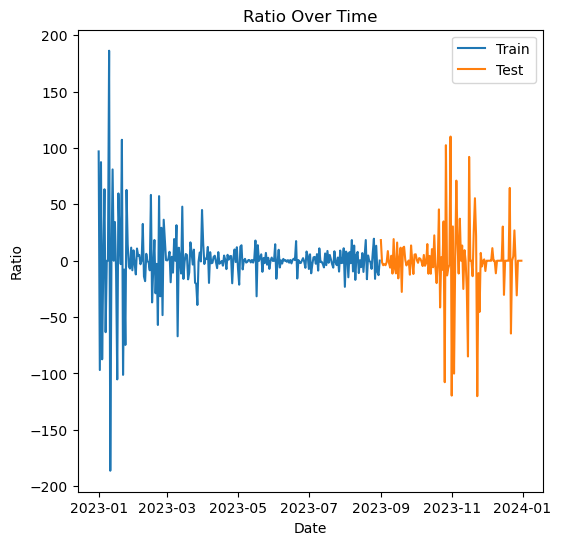

In [58]:
# Plotting the data
plt.figure(figsize=(6, 6))  # Setting the figure size for the plot
plt.plot(train_fbo0023["Ratio"], label='Train')  # Plotting the training data
plt.plot(test_fbo0023["Ratio"], label='Test')  # Plotting the testing data
plt.title('Ratio Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Ratio')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot

In [10]:
# ARIMA modeling
from pmdarima import auto_arima  # Importing the auto_arima function from pmdarima
  # Creating a new series 'train1' for ARIMA modeling
auto_model = auto_arima(train_fbo0023["Ratio"], seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)  # Fitting the ARIMA model
auto_model.summary()  # Displaying the summary of the model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2211.181, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2337.358, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2271.789, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2212.229, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2209.215, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2213.741, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2213.665, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2211.190, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2214.485, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2214.638, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2214.403, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2209.899, Time=0.21 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.640 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1100.608
Date:                Wed, 20 Nov 2024   AIC                           2209.215
Time:                        15:36:41   BIC                           2223.187
Sample:                    01-01-2023   HQIC                          2214.843
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8666      0.046    -18.795      0.000      -0.957      -0.776
ma.L1          0.0652      0.045      1.449      0.147      -0.023       0.153
ma.L2         -0.8522      0.035    -24.044      0.000      -0.922      -0.783
sigma2       499.2712     19.594     25.481      0.000     460.868     537.675
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1983.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
# Further ARIMA modeling and forecasting
from statsmodels.tsa.arima.model import ARIMA  # Importing the ARIMA model
#data.index.freq = "1min"  # Setting the frequency of the data index to 1 minute
#data.index = pd.DatetimeIndex(data.index).to_period("1min")  # Converting the data index to DatetimeIndex with 1-minute period


In [61]:
#np.asarray(train_fbo0023)

train_fbo0023.dtypes

PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [12]:
# Calculate the means and convert Series to DataFrame
data_mean = data.groupby(data.index.date)['Ratio'].mean().reset_index(name='Ratio')
data_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean().reset_index(name='SunRad')
data_mean_temp = data.groupby(data.index.date)['Temperature'].mean().reset_index(name='Temperature')


# Merge the DataFrames on 'ValueTime'

data_mean.columns = ['ValueTime', 'Ratio']
data_mean_sunrad.columns = ['ValueTime', 'SunRad']
data_mean_temp.columns = ['ValueTime', 'Temperature']
combined_data = pd.merge(pd.merge(data_mean, data_mean_sunrad, on='ValueTime'), data_mean_temp, on='ValueTime')

# Save the DataFrames to CSV
data_mean.to_csv('meandata/Ratio_data.csv', index=False)
data_mean_sunrad.to_csv('meandata/Sunrad_data.csv', index=False)
data_mean_temp.to_csv('meandata/Temperature_data.csv', index=False)
combined_data.to_csv('meandata/Combined_Means.csv', index=False)



# Read the CSV files back into the environment


In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using ADF test
def check_stationarity(data, column):
    result = adfuller(data[column].dropna())
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value for {column}: {result[1]}')
    return result[1] <= 0.05

# Apply differencing if not stationary
def apply_differencing(data, column):
    if not check_stationarity(data, column):
        data[column] = data[column].diff().fillna(0)
    return data

# Function to split the data and save it as train and test sets
def split_and_save(data, filename_prefix):
    # Apply differencing if necessary for each column
    for column in data.columns:
        data = apply_differencing(data, column)

    # Replace any remaining NaN values with zero
    data = data.fillna(0)

    # Check stationarity again and apply further differencing if needed
    for column in data.columns:
        data = apply_differencing(data, column)

    # Replace any remaining NaN values with zero again
    data = data.fillna(0)

    # Determine the split point for 70% train, 30% test
    split_point = int(0.7 * len(data))
    train, test = data[:split_point], data[split_point:]

    # Save the train and test data to CSV
    train.to_csv(f'TrainTest/{filename_prefix}_train.csv')
    test.to_csv(f'TrainTest/{filename_prefix}_test.csv')

    # Return the train and test data
    return train, test

# Read the CSV files back into the environment
Ratio_data = pd.read_csv('meandata/Ratio_data.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
sunrad_data = pd.read_csv('meandata/Sunrad_data.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
Temp_data = pd.read_csv('meandata/Temperature_data.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
combined_data_check = pd.read_csv('meandata/Combined_Means.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

# Split and save the datasets after applying differencing if needed
ratio_train, ratio_test = split_and_save(Ratio_data, 'Ratio')
sunrad_train, sunrad_test = split_and_save(sunrad_data, 'SunRad')
temp_train, temp_test = split_and_save(Temp_data, 'Temperature')
combined_train, combined_test = split_and_save(combined_data_check, 'Combined')

# Print the train datasets to verify the changes
print("Loaded Ratio Train Data:")
print(ratio_train.head())

print("Loaded SunRad Train Data:")
print(sunrad_train.head())

print("Loaded Temperature Train Data:")
print(temp_train.head())

print("Loaded Combined Train Data:")
print(combined_train.head())


ADF Statistic for Ratio: -2.1618675077028855
p-value for Ratio: 0.22037518058411032
ADF Statistic for Ratio: -8.064932912342496
p-value for Ratio: 1.6057325579056819e-12
ADF Statistic for SunRad: -0.7506087027746973
p-value for SunRad: 0.8332018103751084
ADF Statistic for SunRad: -8.173022852889963
p-value for SunRad: 8.521707208352676e-13
ADF Statistic for Temperature: -1.0468747504869795
p-value for Temperature: 0.7357864179600633
ADF Statistic for Temperature: -9.977701563396147
p-value for Temperature: 2.155569510720135e-17
ADF Statistic for Ratio: -2.1618675077028855
p-value for Ratio: 0.22037518058411032
ADF Statistic for SunRad: -0.7506087027746973
p-value for SunRad: 0.8332018103751084
ADF Statistic for Temperature: -1.0468747504869795
p-value for Temperature: 0.7357864179600633
ADF Statistic for Ratio: -8.064932912342496
p-value for Ratio: 1.6057325579056819e-12
ADF Statistic for SunRad: -8.173022852889963
p-value for SunRad: 8.521707208352676e-13
ADF Statistic for Temperature

In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima


# Function to split the data and save it as train and test sets
def split_and_save(data, filename_prefix):
    # Apply differencing if necessary for each column
 
    # Drop any NaN values that may have resulted from differencing

    # Determine the split point for 70% train, 30% test
    split_point = int(0.7 * len(data))
    train, test = data[:split_point], data[split_point:]

    # Save the train and test data to CSV
    train.to_csv(f'TrainTest/{filename_prefix}_train.csv')
    test.to_csv(f'TrainTest/{filename_prefix}_test.csv')

    # Return the train and test data
    return train, test



# Split and save the datasets after applying differencing if needed
ratio_train, ratio_test = split_and_save(Ratio_data, 'Ratio')
sunrad_train, sunrad_test = split_and_save(sunrad_data, 'SunRad')
temp_train, temp_test = split_and_save(Temp_data, 'Temperature')
combined_train, combined_test = split_and_save(combined_data_check, 'Combined')

# Print the train datasets to verify the changes
print("Loaded Ratio Train Data:")
print(ratio_train.head())

print("Loaded SunRad Train Data:")
print(sunrad_train.head())

print("Loaded Temperature Train Data:")
print(temp_train.head())

print("Loaded Combined Train Data:")
print(combined_train.head())


Loaded Ratio Train Data:
                Ratio
ValueTime            
2023-01-01   0.000000
2023-01-02 -64.473389
2023-01-03   7.654972
2023-01-04 -22.980620
2023-01-05   3.679273
Loaded SunRad Train Data:
                SunRad
ValueTime             
2023-01-01    0.000000
2023-01-02 -255.514706
2023-01-03  606.907895
2023-01-04 -603.157895
2023-01-05    9.230769
Loaded Temperature Train Data:
            Temperature
ValueTime              
2023-01-01     0.000000
2023-01-02     3.873820
2023-01-03    -4.933582
2023-01-04    -1.523945
2023-01-05     0.540171
Loaded Combined Train Data:
                Ratio      SunRad  Temperature
ValueTime                                     
2023-01-01   0.000000    0.000000     0.000000
2023-01-02 -64.473389 -255.514706     3.873820
2023-01-03   7.654972  606.907895    -4.933582
2023-01-04 -22.980620 -603.157895    -1.523945
2023-01-05   3.679273    9.230769     0.540171


In [15]:
import pandas as pd

def load_train_test(filename_prefix):
    # Load the train and test data from CSV files
    train = pd.read_csv(f'TrainTest/{filename_prefix}_train.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
    test = pd.read_csv(f'TrainTest/{filename_prefix}_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

    return train, test

# Load Ratio data sets
ratio_train, ratio_test = load_train_test('Ratio')
print("Loaded Ratio Train Data:")
print(ratio_train.head())

# Load SunRad data sets
sunrad_train, sunrad_test = load_train_test('SunRad')
print("Loaded SunRad Train Data:")
print(sunrad_train.head())

# Load Temperature data sets
temp_train, temp_test = load_train_test('Temperature')
print("Loaded Temperature Train Data:")
print(temp_train.head())



combined_train, combined_test = load_train_test('combined')



Loaded Ratio Train Data:
                Ratio
ValueTime            
2023-01-01   0.000000
2023-01-02 -64.473389
2023-01-03   7.654972
2023-01-04 -22.980620
2023-01-05   3.679273
Loaded SunRad Train Data:
                SunRad
ValueTime             
2023-01-01    0.000000
2023-01-02 -255.514706
2023-01-03  606.907895
2023-01-04 -603.157895
2023-01-05    9.230769
Loaded Temperature Train Data:
            Temperature
ValueTime              
2023-01-01     0.000000
2023-01-02     3.873820
2023-01-03    -4.933582
2023-01-04    -1.523945
2023-01-05     0.540171


In [66]:
print(ratio_train["Ratio"])


ValueTime
2023-01-01     0.000000
2023-01-02   -64.473389
2023-01-03     7.654972
2023-01-04   -22.980620
2023-01-05     3.679273
2023-01-06     5.551433
2023-01-07    13.678727
2023-01-08   -29.118769
2023-01-09    59.246246
2023-01-10    23.997776
2023-01-11   -75.373887
2023-01-12    73.363505
2023-01-13   -18.694881
2023-01-14    18.487651
2023-01-15    -3.246893
2023-01-16    -7.943671
2023-01-17   -66.733186
2023-01-18    59.563110
2023-01-19     8.952423
2023-01-20    -6.014736
2023-01-21    17.363934
2023-01-22   -14.443287
2023-01-23   -38.827469
2023-01-24    21.553074
2023-01-25    27.129229
2023-01-26    -8.915469
2023-01-27     0.677927
2023-01-28     8.334685
2023-01-29    -1.260368
2023-01-30    -6.866090
2023-01-31    -6.453784
2023-02-01   -21.978332
2023-02-02   -30.377247
2023-02-03     7.524159
2023-02-04     2.221388
2023-02-05     3.405036
2023-02-06    -1.600344
2023-02-07    45.600958
2023-02-08    23.216998
2023-02-09   -12.876041
2023-02-10    -3.532441
2023-0

In [16]:
auto_model = auto_arima(ratio_train['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())
best_order = auto_model.order


model = ARIMA(ratio_train, order=(best_order))  # Initializing the ARIMA model with specified order
fitted_model_mean = model.fit()  # Fitting the ARIMA model
fitted_model_mean.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2099.488, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2121.669, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2105.372, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2105.051, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2108.589, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2107.800, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2106.778, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2109.689, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2108.789, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2071.405, Time=0.57 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=2073.336, Time=0.50 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=2073.600, Time=0.39 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=2

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Ratio   No. Observations:                  255
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1025.496
Date:                Wed, 20 Nov 2024   AIC                           2066.992
Time:                        15:37:14   BIC                           2095.322
Sample:                    01-01-2023   HQIC                          2078.388
                         - 09-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1143      0.049      2.344      0.019       0.019       0.210
ar.L1          1.6882      0.061     27.543      0.000       1.568       1.808
ar.L2         -0.8311      0.051    -16.314      0.000      -0.931      -0.731
ma.L1         -2.1684      0.373     -5.806      0.000      -2.900      -1.436
ma.L2          1.5822      0.439      3.602      0.000       0.721       2.443
ma.L3         -0.4008      0.173     -2.311      0.021      -0.741      -0.061
ma.L4         -0.0128      0.061     -0.210      0.834      -0.132       0.107
sigma2       178.6102     65.370      2.732      0.006      50.488     306.733
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               668.42
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
ratio_train

Ratio
ValueTime            
2023-01-01   0.000000
2023-01-02 -64.473389
2023-01-03   7.654972
2023-01-04 -22.980620
2023-01-05   3.679273
2023-01-06   5.551433
2023-01-07  13.678727
2023-01-08 -29.118769
2023-01-09  59.246246
2023-01-10  23.997776
2023-01-11 -75.373887
2023-01-12  73.363505
2023-01-13 -18.694881
2023-01-14  18.487651
2023-01-15  -3.246893
2023-01-16  -7.943671
2023-01-17 -66.733186
2023-01-18  59.563110
2023-01-19   8.952423
2023-01-20  -6.014736
2023-01-21  17.363934
2023-01-22 -14.443287
2023-01-23 -38.827469
2023-01-24  21.553074
2023-01-25  27.129229
2023-01-26  -8.915469
2023-01-27   0.677927
2023-01-28   8.334685
2023-01-29  -1.260368
2023-01-30  -6.866090
2023-01-31  -6.453784
2023-02-01 -21.978332
2023-02-02 -30.377247
2023-02-03   7.524159
2023-02-04   2.221388
2023-02-05   3.405036
2023-02-06  -1.600344
2023-02-07  45.600958
2023-02-08  23.216998
2023-02-09 -12.876041
2023-02-10  -3.532441
2023-02-11  -3.818154
2023-02-12   5.632460
2023-02-13  -2.823382
2023-02-14  -1.559795
2023-02-15  12.213022
2023-02-16  -1.675258
2023-02-17   4.800956
2023-02-18  -7.764791
2023-02-19  -6.854417
2023-02-20 -43.612069
2023-02-21 -15.162890
2023-02-22   9.965604
2023-02-23 -15.712947
2023-02-24   5.196269
2023-02-25  -4.266071
2023-02-26  12.870826
2023-02-27  36.627553
2023-02-28  21.940226
2023-03-01  -6.041354
2023-03-02  -2.421498
2023-03-03  -2.867914
2023-03-04   8.220232
2023-03-05   0.998188
2023-03-06 -32.039370
2023-03-07  30.097646
2023-03-08 -76.561572
2023-03-09  16.129659
2023-03-10  -0.196179
2023-03-11  14.270186
2023-03-12   4.662647
2023-03-13   3.302972
2023-03-14  31.508337
2023-03-15   5.200183
2023-03-16  -1.087210
2023-03-17   2.095269
2023-03-18   2.192554
2023-03-19   4.741796
2023-03-20  -2.158877
2023-03-21  -0.912795
2023-03-22   1.754094
2023-03-23  -5.459838
2023-03-24   3.663171
2023-03-25 -34.353019
2023-03-26 -31.737561
2023-03-27  -6.870130
2023-03-28  14.719578
2023-03-29  13.767426
2023-03-30  -4.861223
2023-03-31  29.034187
2023-04-01  11.860256
2023-04-02   3.736877
2023-04-03  -2.164077
2023-04-04   4.437653
2023-04-05  -7.208351
2023-04-06  -0.172681
2023-04-07  10.467977
2023-04-08  -7.178524
2023-04-09  -7.127645
2023-04-10   8.916919
2023-04-11   2.419202
2023-04-12  -2.999513
2023-04-13  -0.352733
2023-04-14  11.546952
2023-04-15 -10.087371
2023-04-16  -0.990704
2023-04-17  -0.610296
2023-04-18   4.784327
2023-04-19  -4.589599
2023-04-20   0.110596
2023-04-21   0.370527
2023-04-22  -0.668520
2023-04-23   2.997319
2023-04-24   1.084539
2023-04-25  11.538871
2023-04-26 -14.154144
2023-04-27   8.355191
2023-04-28  -6.298753
2023-04-29  -3.742904
2023-04-30   2.373219
2023-05-01   3.895315
2023-05-02   5.738881
2023-05-03  -9.297594
2023-05-04   1.266621
2023-05-05   0.372693
2023-05-06  -2.799641
2023-05-07  -0.169561
2023-05-08  -0.224793
2023-05-09   0.272798
2023-05-10   0.721442
2023-05-11   0.290855
2023-05-12  -1.046416
2023-05-13  -2.002394
2023-05-14   1.644669
2023-05-15   5.282754
2023-05-16   6.810578
2023-05-17  -2.829503
2023-05-18  -7.904169
2023-05-19  -1.037000
2023-05-20  -0.688052
2023-05-21   0.717176
2023-05-22   0.451700
2023-05-23  -0.823921
2023-05-24   0.167458
2023-05-25   1.043956
2023-05-26   0.687380
2023-05-27   0.466914
2023-05-28  -1.156841
2023-05-29   1.430008
2023-05-30  -1.764476
2023-05-31  -0.727791
2023-06-01  -0.615573
2023-06-02   0.197100
2023-06-03   0.959329
2023-06-04   2.358188
2023-06-05  -4.295995
2023-06-06   1.356507
2023-06-07  -1.185368
2023-06-08   4.765180
2023-06-09  -4.490790
2023-06-10  -1.023985
2023-06-11   0.566044
2023-06-12  -0.301130
2023-06-13  -0.441442
2023-06-14   1.887070
2023-06-15  -3.070382
2023-06-16   2.890689
2023-06-17  -1.480182
2023-06-18  -0.891548
2023-06-19   7.655337
2023-06-20  -4.465807
2023-06-21  -1.358852
2023-06-22  -0.281465
2023-06-23  -3.827940
2023-06-24   7.166318
2023-06-25  -3.659598
2023-06-26   0.515761
2023-06-27  -1.699425
2023-06-28   2.004840
2023-06-29  -1.513507
2023-06-30  

In [17]:
forecast_arima_mean = fitted_model_mean.forecast(steps=len(ratio_test))  # Forecasting using the fitted model
#print(ratio_test)
print(ratio_test  )



                Ratio
ValueTime            
2023-09-13  -3.502632
2023-09-14 -13.496207
2023-09-15  11.780050
2023-09-16  -8.257813
2023-09-17  -0.519911
2023-09-18   3.694788
2023-09-19  10.834510
2023-09-20  -5.722932
2023-09-21  -8.719118
2023-09-22  -2.252466
2023-09-23   1.884800
2023-09-24   0.702429
2023-09-25   5.105477
2023-09-26  -6.737957
2023-09-27   2.434287
2023-09-28  -2.128397
2023-09-29  18.243475
2023-09-30 -17.310744
2023-10-01   1.460771
2023-10-02  25.554398
2023-10-03 -19.428534
2023-10-04  -2.196249
2023-10-05  17.074605
2023-10-06 -17.893438
2023-10-07  -3.023938
2023-10-08   4.851376
2023-10-09  -2.744274
2023-10-10   0.677971
2023-10-11  12.249980
2023-10-12 -15.677432
2023-10-13   3.100851
2023-10-14  -3.465240
2023-10-15   5.569346
2023-10-16  -5.311143
2023-10-17   5.820127
2023-10-18  -4.295504
2023-10-19  -3.081308
2023-10-20   4.809338
2023-10-21   6.262911
2023-10-22  -1.905666
2023-10-23  -8.507962
2023-10-24   6.704201
2023-10-25   2.197270
2023-10-26

In [70]:
print(forecast_arima_mean) # 'B' colum)

2023-09-13   -0.124211
2023-09-14    2.113801
2023-09-15    1.270077
2023-09-16    0.326076
2023-09-17   -0.488727
2023-09-18   -1.079714
2023-09-19   -1.400233
2023-09-20   -1.450167
2023-09-21   -1.268084
2023-09-22   -0.919198
2023-09-23   -0.481541
2023-09-24   -0.032655
2023-09-25    0.361416
2023-09-26    0.653614
2023-09-27    0.819390
2023-09-28    0.856408
2023-09-29    0.781126
2023-09-30    0.623272
2023-10-01    0.419352
2023-10-02    0.206290
2023-10-03    0.016078
2023-10-04   -0.127962
2023-10-05   -0.213043
2023-10-06   -0.236966
2023-10-07   -0.206643
2023-10-08   -0.135570
2023-10-09   -0.040787
2023-10-10    0.060156
2023-10-11    0.151792
2023-10-12    0.222598
2023-10-13    0.265974
2023-10-14    0.280354
2023-10-15    0.268582
2023-10-16    0.236756
2023-10-17    0.192813
2023-10-18    0.145079
2023-10-19    0.101016
2023-10-20    0.066301
2023-10-21    0.044316
2023-10-22    0.036052
2023-10-23    0.040374
2023-10-24    0.054536
2023-10-25    0.074854
2023-10-26 

Mean Absolute Error (MAE): 11.96
Plot saved to Plot_ARIMA_MEAN/forecast_plot_forecast.png


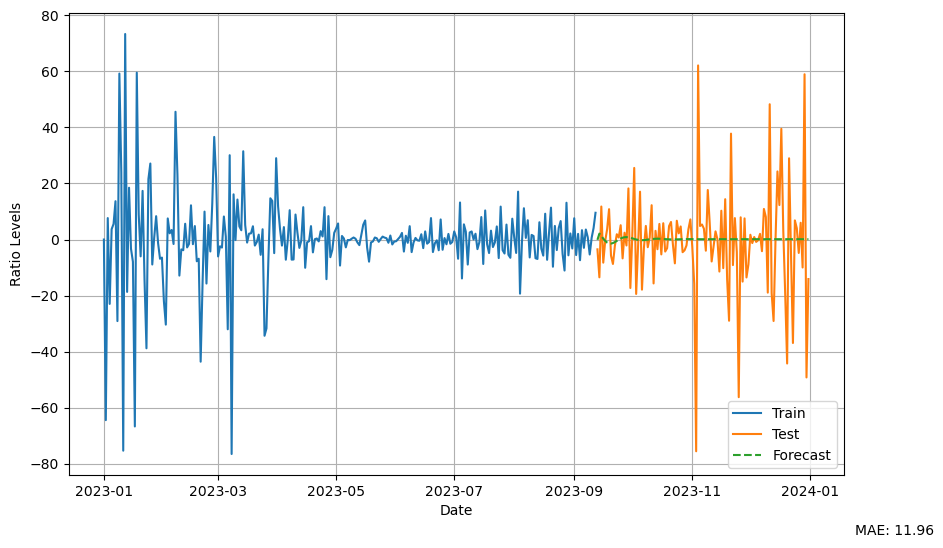

'Plot_ARIMA_MEAN/forecast_plot_forecast.png'

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import os

# Ensure the directory for saving plots exists
save_dir = "Plot_ARIMA_MEAN"
os.makedirs(save_dir, exist_ok=True)

def plot_forecast(train, test, forecast, key, show=True, save=False):
    identifier = key.split('_')[-1]  # Splits the key and takes the last part, which is the identifier
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    #plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast_arima_mean - ratio_test["Ratio"]))

    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    if save:
        save_path = f'{save_dir}/forecast_plot_{identifier}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    if show:
        plt.show()
    else:
        plt.close()

    return save_path if save else None

# Example usage:
# Assuming ratio_train, ratio_test, and forecast_arima_mean are defined and valid pandas Series with datetime indices
plot_forecast(ratio_train, ratio_test, forecast_arima_mean, key="arima_ratio_forecast", show=True, save=True)

# Calculating and Printing Mean Absolute Error (MAE)


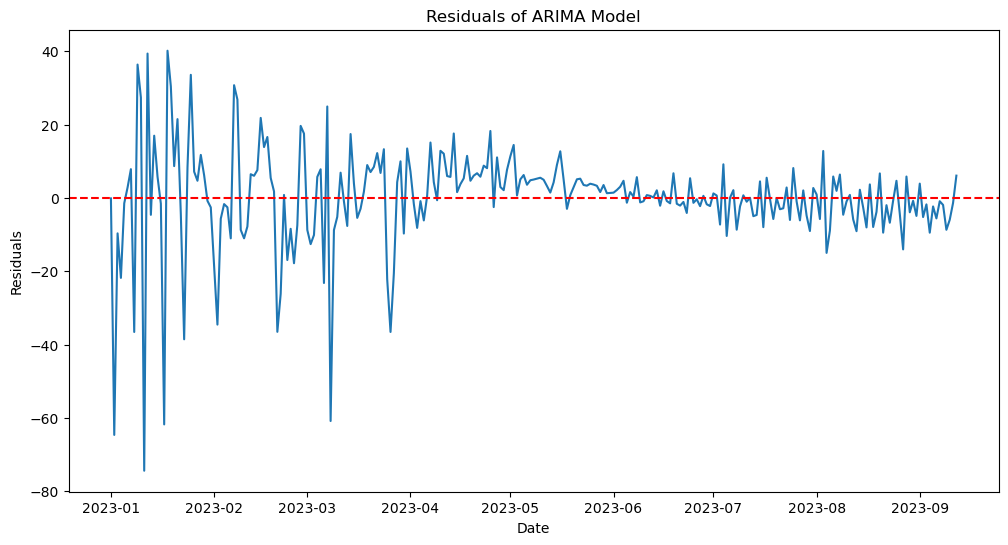

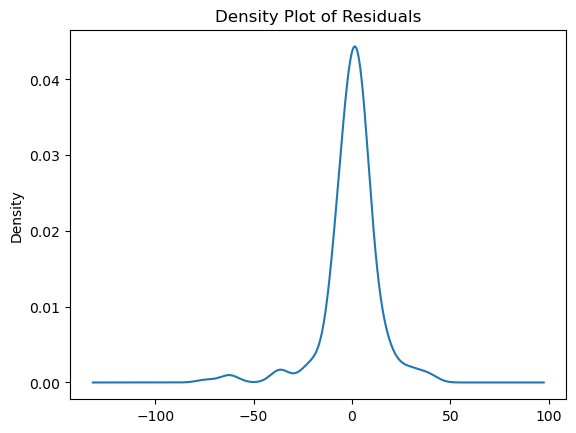

Ljung-Box test p-value: lb_pvalue
Shapiro-Wilk Test p-value: 7.340557986286402e-16


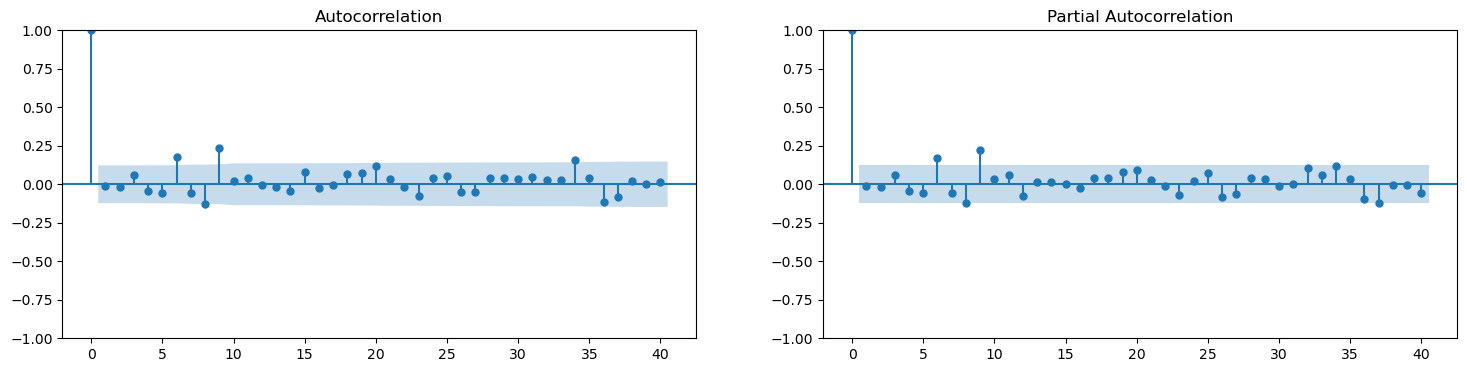

In [72]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Assuming 'model_fit' is your fitted ARIMA model
residuals = fitted_model_mean.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

# Ljung-Box test
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("Ljung-Box test p-value:", lb_pvalue)

# Shapiro-Wilk test for normality
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test p-value:', p)

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)
plt.show()


In [73]:
print(test_ratio_fbo0023)

                 Ratio
ValueTime             
2023-09-01   18.312027
2023-09-02   -1.323712
2023-09-03   -4.024448
2023-09-04   -3.024203
2023-09-05   -4.001254
2023-09-06   -1.297311
2023-09-07    8.555370
2023-09-08   -2.037276
2023-09-09   -6.170996
2023-09-10    4.415294
2023-09-11  -11.425098
2023-09-12   19.183743
2023-09-13   -6.528233
2023-09-14  -11.237965
2023-09-15   16.136670
2023-09-16  -15.660485
2023-09-17    1.775021
2023-09-18   11.545961
2023-09-19  -27.673239
2023-09-20   11.385455
2023-09-21   12.404830
2023-09-22    0.976271
2023-09-23   -4.222346
2023-09-24   -1.577821
2023-09-25    0.222362
2023-09-26  -12.401106
2023-09-27   13.551328
2023-09-28   -0.181087
2023-09-29  -11.771277
2023-09-30    5.486299
2023-10-01    5.738713
2023-10-02    0.498294
2023-10-03   -1.856915
2023-10-04    2.331739
2023-10-05    1.688538
2023-10-06   -0.808582
2023-10-07   -4.746665
2023-10-08    5.116601
2023-10-09   -4.498322
2023-10-10   -2.159625
2023-10-11   14.771083
2023-10-12 

In [74]:
print(train_ratio_fbo0023)


                 Ratio
ValueTime             
2023-01-01   96.956513
2023-01-02  -96.956513
2023-01-03   87.450395
2023-01-04  -87.450395
2023-01-05    0.000000
2023-01-06   63.392850
2023-01-07  -63.392850
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10  186.289509
2023-01-11 -186.289509
2023-01-12    0.000000
2023-01-13   80.977175
2023-01-14    0.000000
2023-01-15   34.326878
2023-01-16  -10.043953
2023-01-17 -105.260100
2023-01-18   59.701184
2023-01-19   19.821505
2023-01-20   -3.021971
2023-01-21  107.275739
2023-01-22 -101.258885
2023-01-23   -7.818750
2023-01-24  -74.698822
2023-01-25   62.784883
2023-01-26   14.460045
2023-01-27   -5.348374
2023-01-28   -6.958080
2023-01-29   11.621979
2023-01-30   -8.485903
2023-01-31    9.194996
2023-02-01   -2.909165
2023-02-02  -12.153862
2023-02-03   10.816943
2023-02-04    4.532490
2023-02-05    5.134370
2023-02-06   -3.145605
2023-02-07    0.000000
2023-02-08   32.629214
2023-02-09  -13.954661
2023-02-10  -18.109547
2023-02-11 

Processing train_ratio_fbo0023
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2211.181, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2337.358, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2271.789, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2212.229, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2209.215, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2213.741, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2213.665, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2211.190, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2214.485, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2214.638, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2214.403, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2209.899, Time=0.17 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.494 seconds
                               SARIMAX Results           

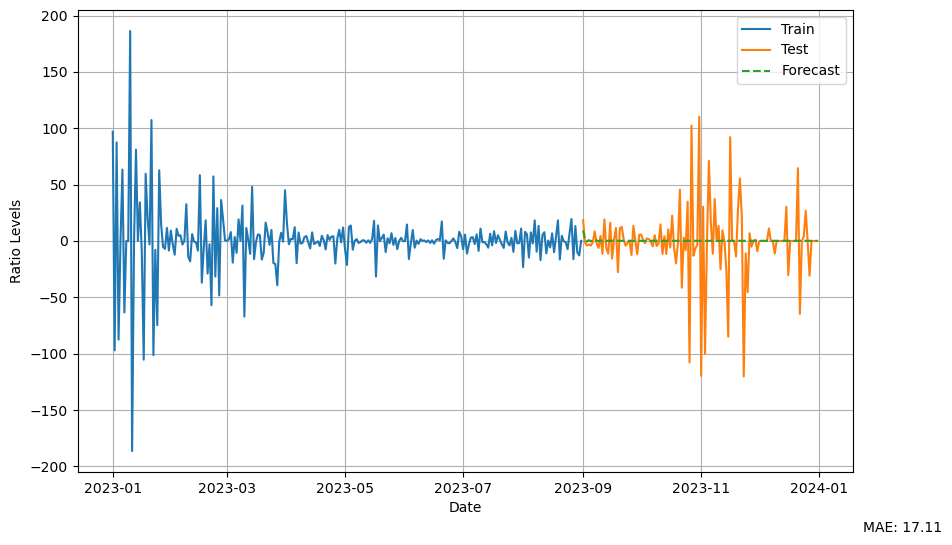

Processing train_ratio_fsk0003
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2119.663, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2138.478, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2136.069, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2133.165, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2103.710, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2120.576, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2102.729, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2127.005, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2125.924, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.924 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(1, 0, 1

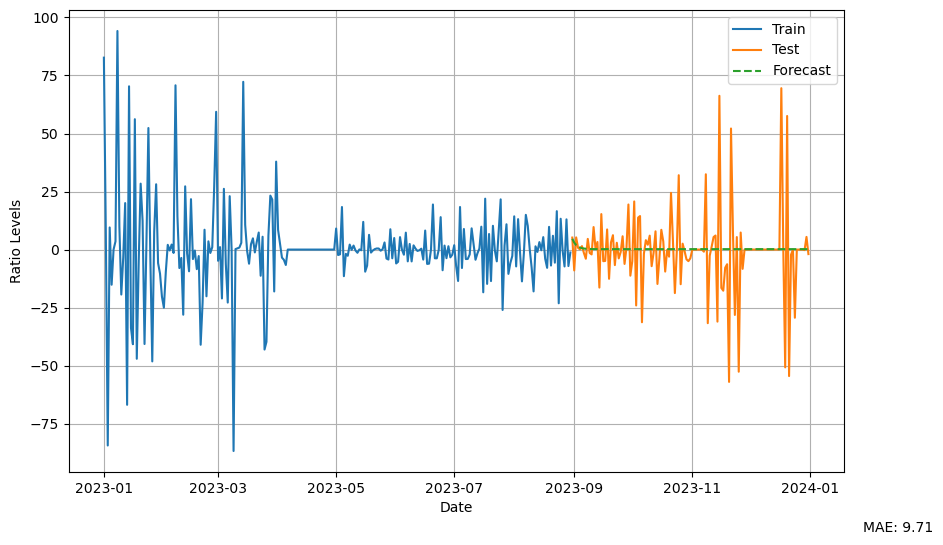

Processing train_ratio_fsk0005
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2130.168, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2254.175, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2175.276, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2130.638, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2130.577, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2132.626, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2132.086, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2132.221, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2132.633, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2129.939, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2133.072, Time=0.07 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2137.072, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2132.634, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2135.060, Time=0.11 sec
 A

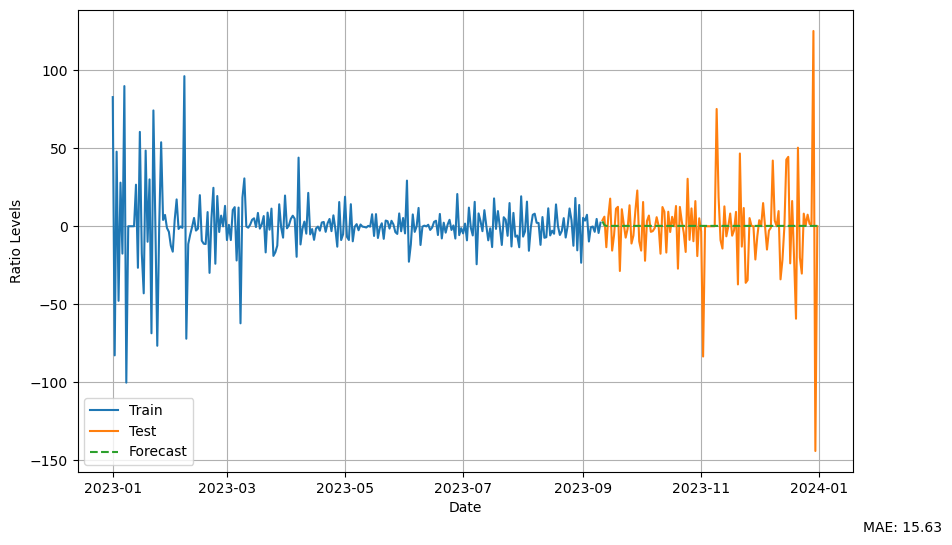

Processing train_ratio_fsk0006
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2394.702, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2366.176, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2332.434, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2392.740, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2316.296, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2318.298, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2346.235, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2315.246, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2330.650, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2364.212, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2317.096, Time=0.11 sec
 ARIMA(1,1,2)(0,0

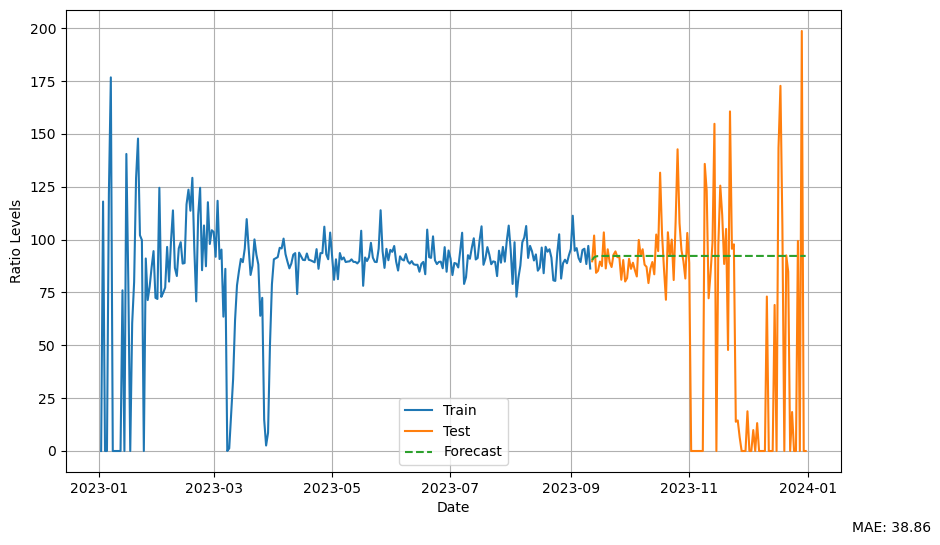

Processing train_ratio_fsk0007
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2262.015, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2401.980, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2347.363, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2261.819, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2262.280, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2262.273, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2264.500, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.753 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1128.910
Date:                Wed, 20 Nov 2024   AIC                           2261.819
Time:     

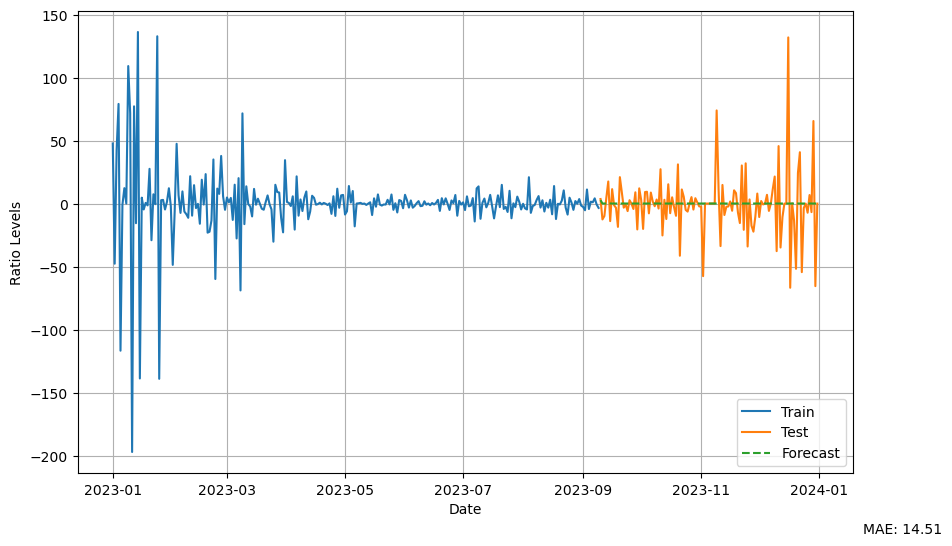

Processing train_ratio_fsk0008
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.026, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=823.163, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=848.026, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=798.350, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=800.299, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=796.350, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=821.163, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=798.299, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=793.357, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             

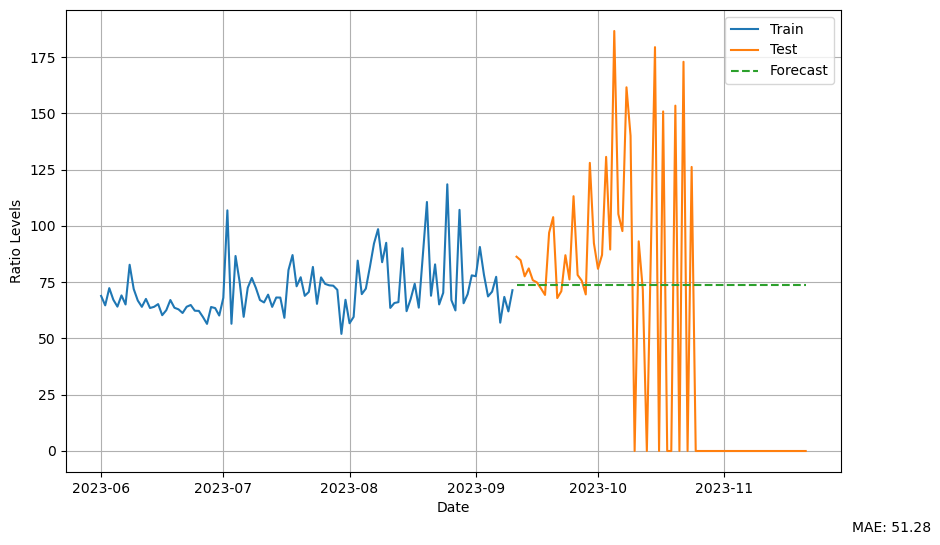

Processing train_ratio_mic0001
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2117.097, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2199.060, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2181.983, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2156.603, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2131.797, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2149.160, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2117.519, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2117.090, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2121.385, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2124.453, Time=0.39 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=2123.042, Time=0.37 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2121.260, Time=0.51 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=2125.984, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2118.180, Time=0.33 sec

B

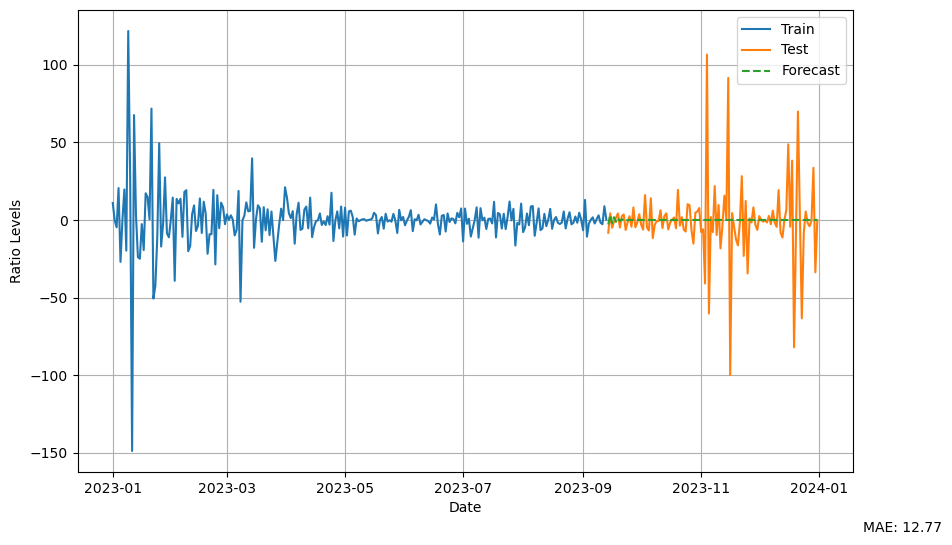

Processing train_ratio_sbo0001
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2137.808, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2161.659, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2143.783, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2137.464, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2117.644, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2137.629, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2139.007, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2138.237, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2136.158, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.085 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  235
Model:               SARIMAX(1, 0, 1

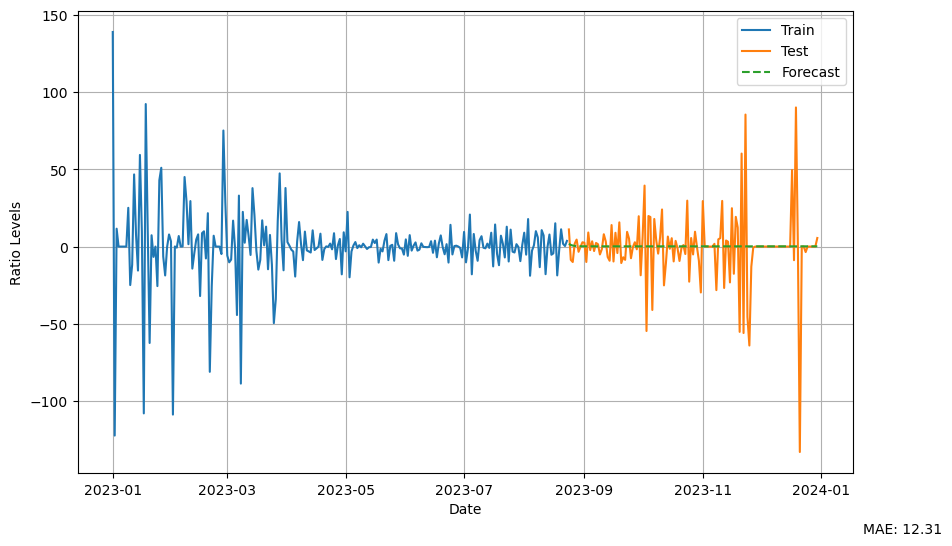

Processing train_ratio_sbo0002
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1990.650, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2019.393, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2019.328, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2017.828, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1989.809, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2006.799, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1989.662, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1990.220, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2011.384, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.007 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  232
Model:               SARIMAX(1, 0, 1

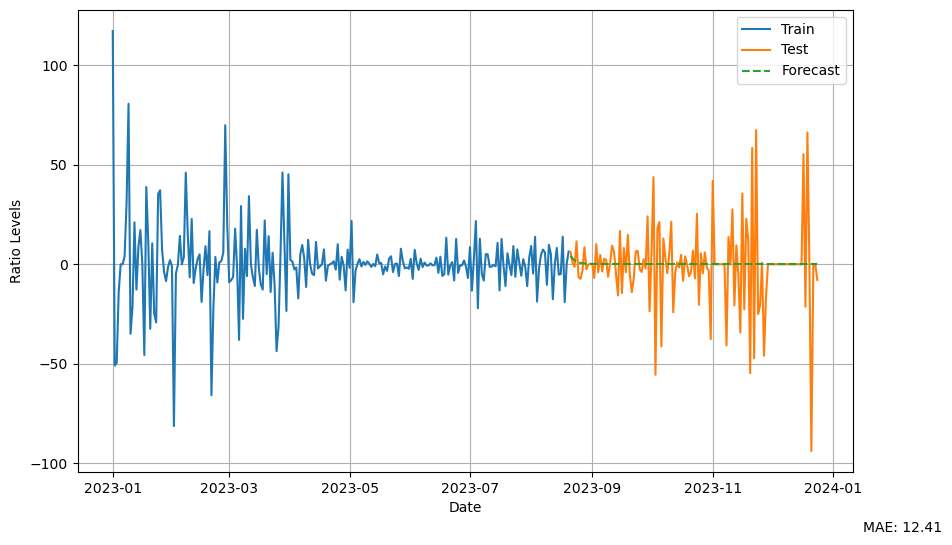

Processing train_ratio_sbo0005
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2520.097, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2521.123, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2520.823, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2518.099, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.962 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1258.050
Date:                Wed, 20 Nov 2024   AIC                           2518.099
Time:                        15:39:58   BIC                           2521.734
Sample:                    01-01-2023   HQIC                        

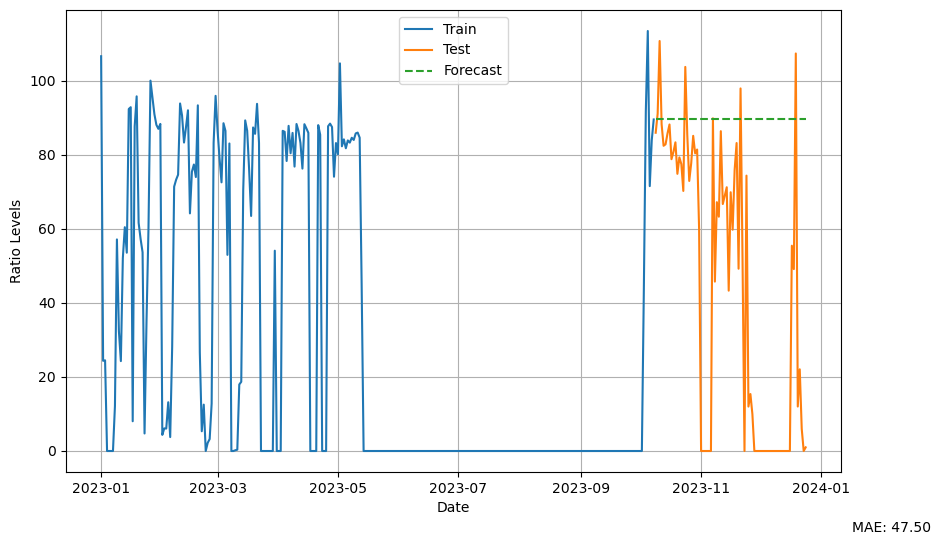

Processing train_ratio_sbo0007
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2240.508, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2223.841, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2212.843, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2238.509, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2204.744, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2202.772, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2194.123, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             :

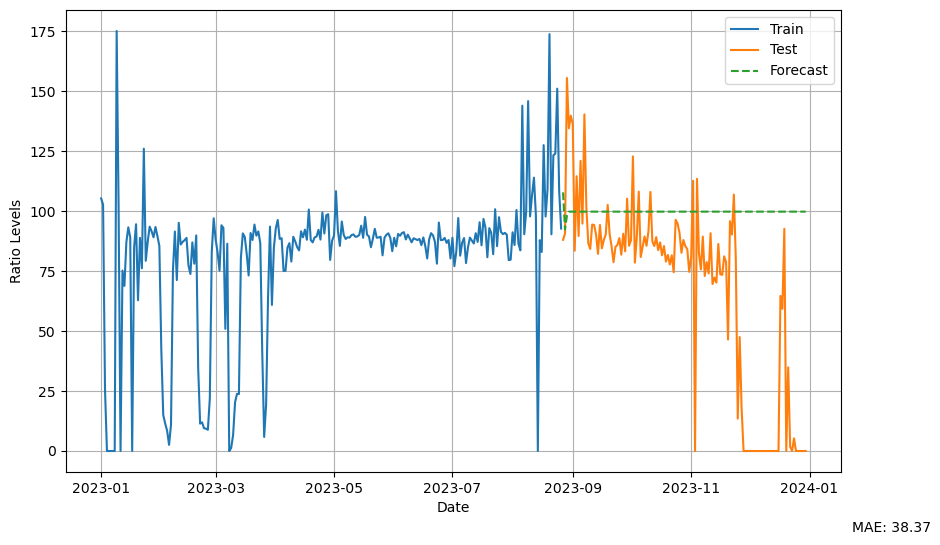

Processing train_ratio_sbo0011
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2049.133, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2085.887, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2078.322, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2075.264, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2047.132, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2068.779, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2045.133, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2047.132, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2077.415, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.038 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  241
Model:               SARIMAX(1, 0, 1

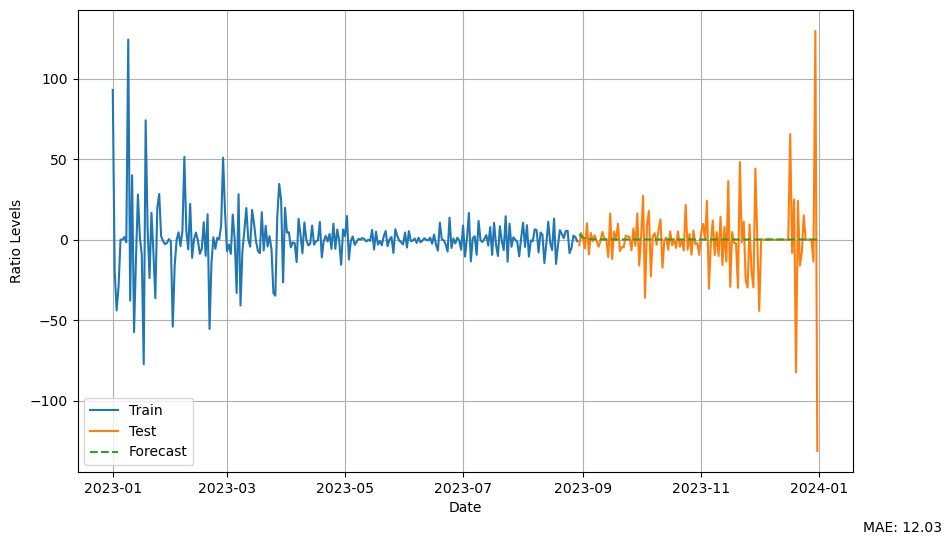

Processing train_ratio_sbo0012
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2176.401, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2200.946, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2192.551, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2186.309, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2198.963, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2181.385, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2177.538, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2177.079, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2176.360, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2182.556, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2158.519, Time=0.58 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2151.228, Time=1.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=2146.703, Time=0.64 sec
 ARIMA(

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 34.98


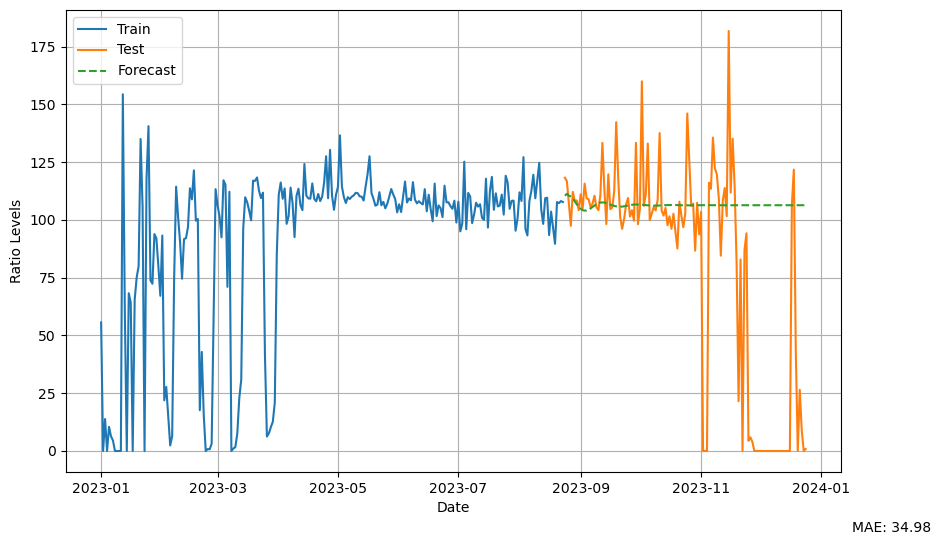

Processing train_ratio_sbo0013
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2082.419, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2141.361, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2111.754, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2106.880, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2088.431, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2087.071, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2084.245, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2084.229, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2090.281, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2088.669, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2105.542, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2080.155, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,1

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error (MAE): 11.07


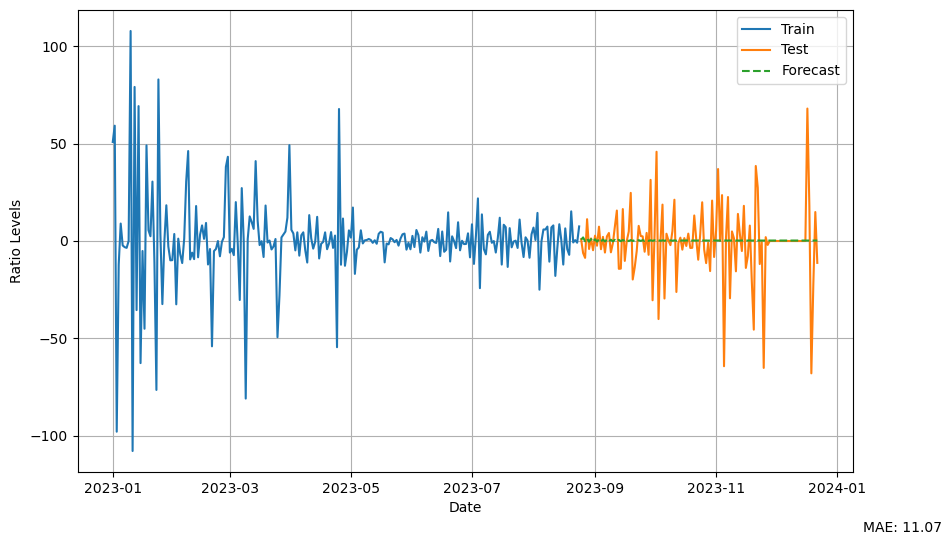

Processing train_ratio_sbo0014
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2309.962, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2364.062, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2336.153, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2315.538, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2298.447, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2302.064, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2298.805, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2303.140, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2304.008, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2308.002, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2296.718, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2285.788, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2288.988, Time=0.25 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=2287.261, Time=0.36 sec
 A

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error (MAE): 22.36


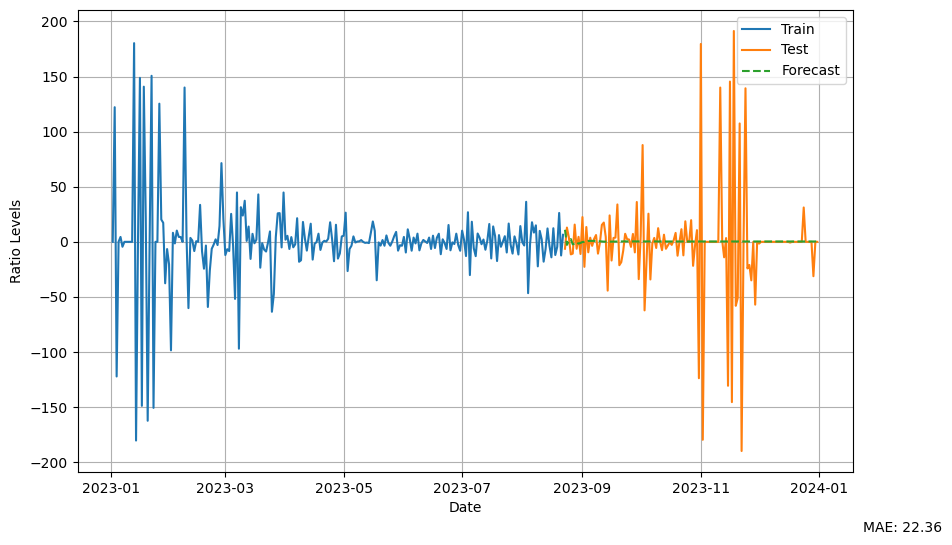

Processing train_ratio_sbo0015
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2147.043, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2199.422, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2169.660, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2163.790, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2166.451, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2144.100, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2147.893, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2167.039, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2146.093, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2168.286, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2146.880, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.067 seconds
                               SARIMAX Results                

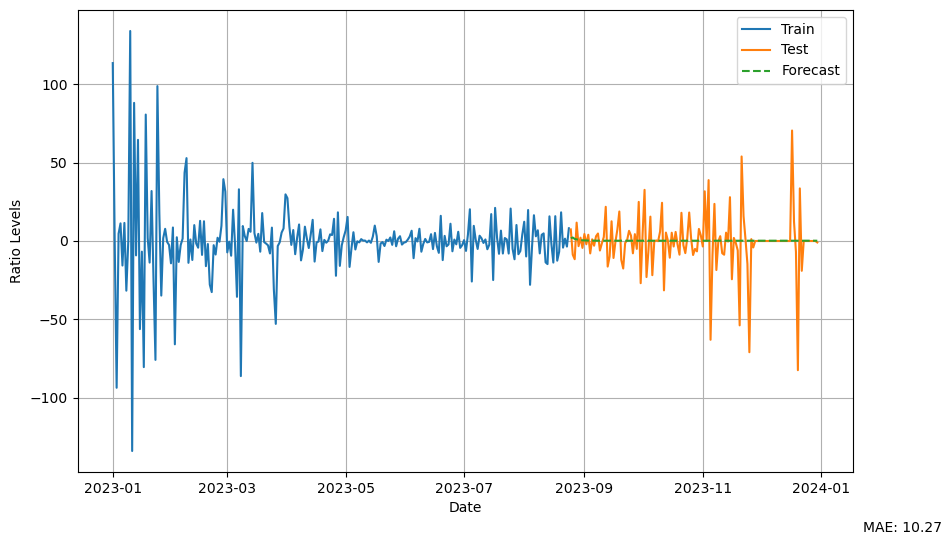

Processing train_ratio_sbo0016
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2309.475, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2363.722, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2333.809, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2332.319, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2361.724, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2308.462, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2312.644, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2334.972, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2308.292, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2336.188, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2307.402, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2337.037, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2306.334, Time=0.50 sec
 ARIMA(

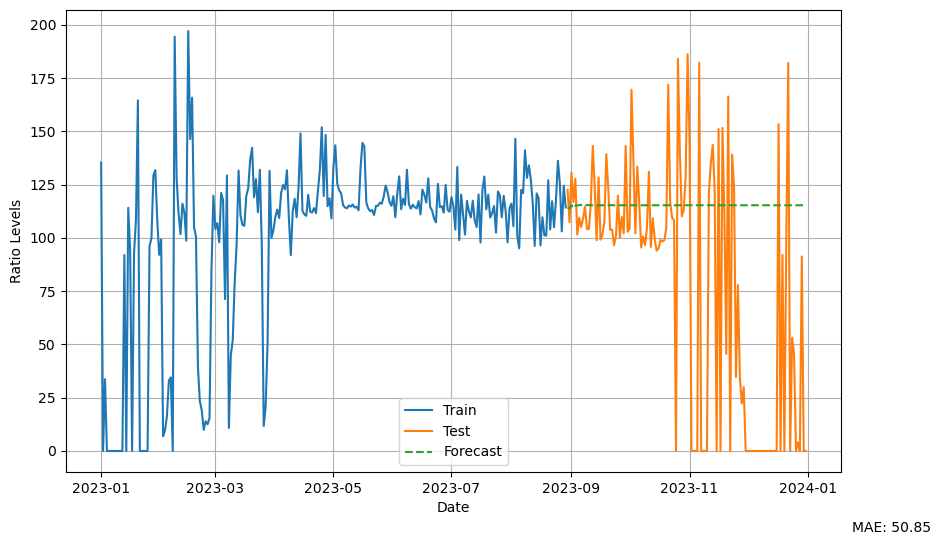

Processing train_ratio_sbo0017
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2300.142, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2332.293, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2307.901, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2298.721, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2284.203, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2298.608, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2300.397, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2299.242, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2297.654, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.913 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  235
Model:               SARIMAX(1, 0, 1

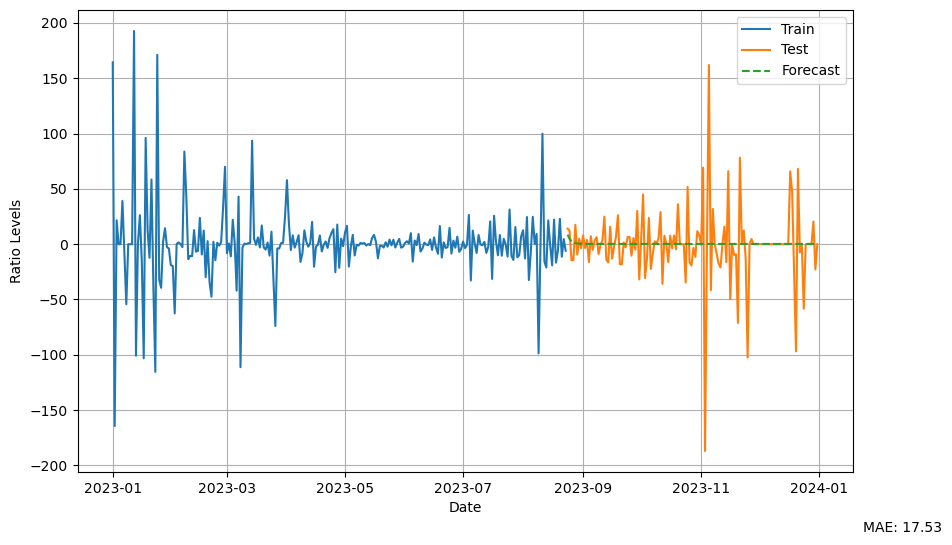

Processing train_ratio_sbo0028
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2414.038, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2306.876, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2309.479, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2412.053, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2300.164, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2288.653, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2232.205, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2232.844, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2229.465, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2226.924, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2299.768, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2227.982, Time=0.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2186.758, Time=0.36 sec
 ARIMA(

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error (MAE): 34.98


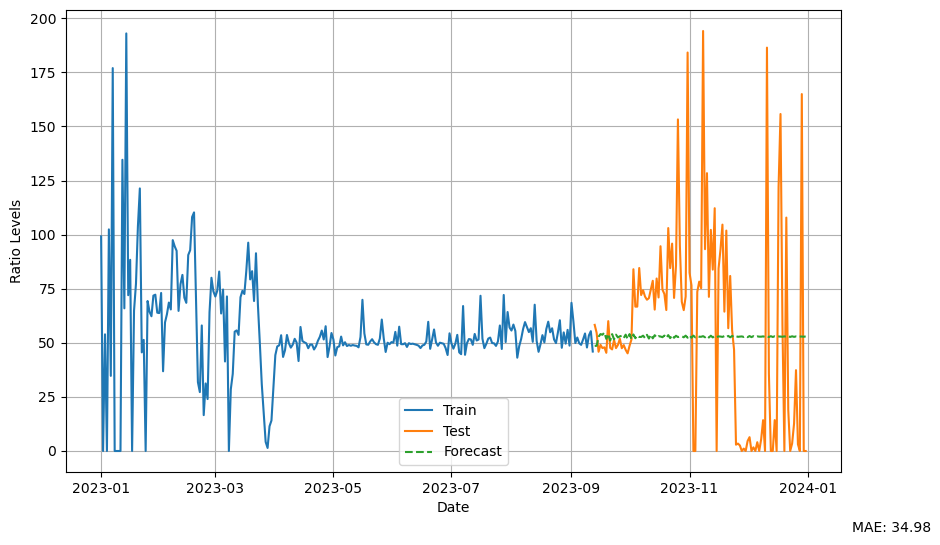

Processing train_ratio_sbo0030
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1046.188, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1082.001, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1066.968, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1041.987, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1043.904, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1043.867, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1045.196, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1041.186, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1083.523, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1043.085, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1043.044, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1068.225, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1044.399, Time=0.11 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.936

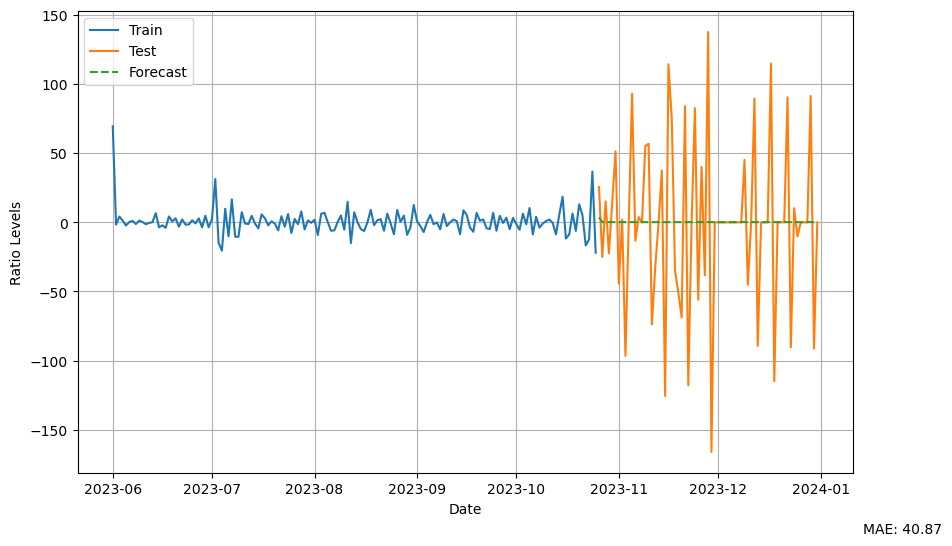

Processing train_ratio_sga0001
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2369.816, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2826.553, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2403.851, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2655.438, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2365.990, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2540.815, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2372.657, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2326.443, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2340.042, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2326.550, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0

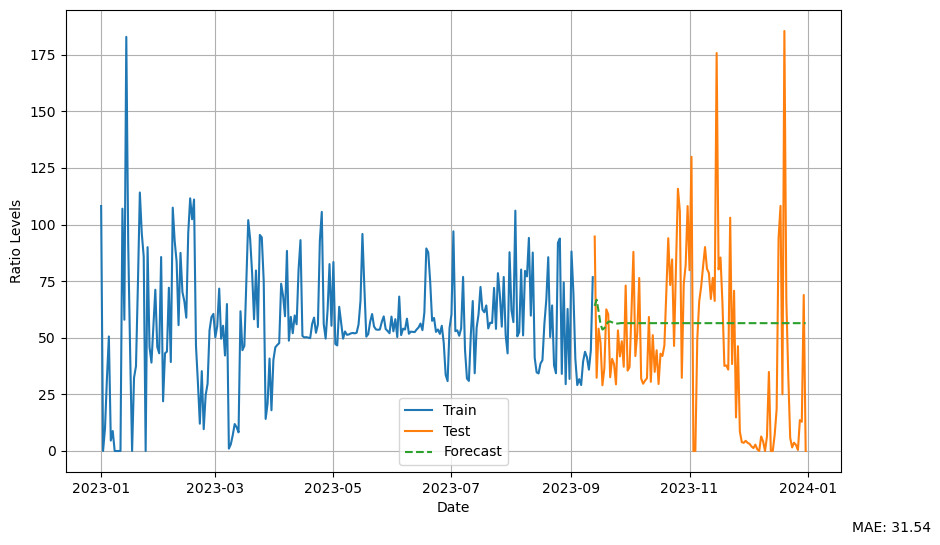

In [20]:
data_frames_test = {
    'test_ratio_fbo0023': test_ratio_fbo0023,
    'test_ratio_fsk0003': test_ratio_fsk0003,
    'test_ratio_fsk0005': test_ratio_fsk0005,
    'test_ratio_fsk0006': test_ratio_fsk0006,
    'test_ratio_fsk0007': test_ratio_fsk0007,
    'test_ratio_fsk0008': test_ratio_fsk0008,
    'test_ratio_mic0001': test_ratio_mic0001,
    'test_ratio_sbo0001': test_ratio_sbo0001,
    'test_ratio_sbo0002': test_ratio_sbo0002,
    'test_ratio_sbo0005': test_ratio_sbo0005,
    'test_ratio_sbo0007': test_ratio_sbo0007,
    'test_ratio_sbo0011': test_ratio_sbo0011,
    'test_ratio_sbo0012': test_ratio_sbo0012,
    'test_ratio_sbo0013': test_ratio_sbo0013,
    'test_ratio_sbo0014': test_ratio_sbo0014,
    'test_ratio_sbo0015': test_ratio_sbo0015,
    'test_ratio_sbo0016': test_ratio_sbo0016,
    'test_ratio_sbo0017': test_ratio_sbo0017,
    'test_ratio_sbo0028': test_ratio_sbo0028,
    'test_ratio_sbo0030': test_ratio_sbo0030,
    'test_ratio_sga0001': test_ratio_sga0001
}


data_frames_train = {
    'train_ratio_fbo0023': train_ratio_fbo0023,
    'train_ratio_fsk0003': train_ratio_fsk0003,
    'train_ratio_fsk0005': train_ratio_fsk0005,
    'train_ratio_fsk0006': train_ratio_fsk0006,
    'train_ratio_fsk0007': train_ratio_fsk0007,
    'train_ratio_fsk0008': train_ratio_fsk0008,
    'train_ratio_mic0001': train_ratio_mic0001,
    'train_ratio_sbo0001': train_ratio_sbo0001,
    'train_ratio_sbo0002': train_ratio_sbo0002,
    'train_ratio_sbo0005': train_ratio_sbo0005,
    'train_ratio_sbo0007': train_ratio_sbo0007,
    'train_ratio_sbo0011': train_ratio_sbo0011,
    'train_ratio_sbo0012': train_ratio_sbo0012,
    'train_ratio_sbo0013': train_ratio_sbo0013,
    'train_ratio_sbo0014': train_ratio_sbo0014,
    'train_ratio_sbo0015': train_ratio_sbo0015,
    'train_ratio_sbo0016': train_ratio_sbo0016,
    'train_ratio_sbo0017': train_ratio_sbo0017,
    'train_ratio_sbo0028': train_ratio_sbo0028,
    'train_ratio_sbo0030': train_ratio_sbo0030,
    'train_ratio_sga0001': train_ratio_sga0001,
}

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Initialize the metric DataFrame to collect Mean Absolute Error
metric = pd.DataFrame(columns=["identifier", "Mae"])

def makemodel(df):
    auto_model = auto_arima(df['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(auto_model.summary())
    p, d, q = auto_model.order
    model = ARIMA(df['Ratio'], order=(p, d, q))
    fitted_model = model.fit()
    return fitted_model

def forecast_models(data_frames_train, data_frames_test):
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key}")
        model = makemodel(df_train)
        test_key = key.replace('train_', 'test_')
        if test_key in data_frames_test:
            df_test = data_frames_test[test_key]
            forecast = model.get_forecast(len(df_test))
            forecasts[test_key] = forecast.summary_frame()
            plot(forecast.summary_frame()['mean'], df_train['Ratio'], df_test['Ratio'], test_key)
    return forecasts

def plot(forecast, train, test, key):
    identifier = key.split('_')[-1]
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    #plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    save_path = f'Plot_ARIMA/forecast_plot_{identifier}.png'
    plt.savefig(save_path, format='png', dpi=300)
    metric.loc[len(metric)] = [identifier, MAE]
    plt.show()

# Run the forecasting function
forecast_results = forecast_models(data_frames_train, data_frames_test)
metric.to_excel("Arima.xlsx", index=False, engine='openpyxl')


In [ ]:
forecast_results

In [ ]:
#train_fbo0023

test_fbo0023

In [ ]:
train_fbo0023_var = train_fbo0023.drop('PlantKey', axis=1)

test_fbo0023_var = test_fbo0023.drop('PlantKey', axis=1)

In [ ]:


#test_fbo0023_var


#test_fbo0023_var
# Assuming 'train_fbo0023_numeric' contains your data
# Calculate the first difference to make data stationary

#train_fbo0023_var['SunRad_diff'] = train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature_diff'] = train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad_diff'] = test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature_diff'] = test_fbo0023_var['Temperature'].diff()


#train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature'].diff()
#train_fbo0023_var['SunRad']= train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature']=train_fbo0023_var['Temperature'].diff()
# Drop the NaN values that come from differencing
train_fbo0023_var = train_fbo0023_var.dropna()
test_fbo0023_var= test_fbo0023_var.dropna()


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)


In [76]:
from statsmodels.tsa.stattools import grangercausalitytests
train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}


train_data_dict

# Function to perform Granger causality test
def granger_test(dataframe, max_lags=2):
    variables = dataframe.columns
    results = {}
    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                test_result = grangercausalitytests(dataframe[[var1, var2]], maxlag=max_lags, verbose=False)
                p_values = [round(test_result[i + 1][0]['ssr_chi2test'][1], 4) for i in range(max_lags)]
                results[f'{var1} causes {var2}'] = p_values
    return results

# Apply Granger causality test on the datasets where stationarity has been checked
for key, df in train_data_dict.items():
    print(df)
    if set(variables_to_test).issubset(df.columns):  # Ensure all variables are in the DataFrame
        print(f"Performing Granger causality tests for dataset {key}...")
        granger_results = granger_test(df[variables_to_test])
        print(granger_results)



           PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-01-01  FBO0023   96.956513   180.0    -0.925000
2023-01-02  FBO0023  -96.956513  -180.0     3.550000
2023-01-03  FBO0023   87.450395   650.0    -4.066667
2023-01-04  FBO0023  -87.450395  -650.0    -2.158333
2023-01-05  FBO0023    0.000000     0.0     0.620833
2023-01-06  FBO0023   63.392850   100.0    -1.883333
2023-01-07  FBO0023  -63.392850  -100.0     4.370833
2023-01-08  FBO0023    0.000000     0.0     3.883333
2023-01-09  FBO0023    0.000000     0.0     0.508333
2023-01-10  FBO0023  186.289509    20.0    -1.000000
2023-01-11  FBO0023 -186.289509   -20.0     1.483333
2023-01-12        0    0.000000     0.0     0.000000
2023-01-13  FBO0023   80.977175   150.0    -0.637500
2023-01-14        0    0.000000     0.0     0.000000
2023-01-15  FBO0023   34.326878   150.0     0.158333
2023-01-16  FBO0023  -10.043953   560.0    -0.483333
2023-01-17  FBO0023 -105.260100  -860.0    -1.

NameError: name 'variables_to_test' is not defined

In [77]:
from statsmodels.tsa.api import VAR , VARMAX

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}
best_lags = {}

for key, df in train_data_dict.items():
    #print(df.drop(["PlantKey"],axis=1))
    #print(df)
    df =df.drop(["PlantKey"],axis=1)
    #df =df.drop(["Temperature"],axis=1)



    #gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)
    model= VAR(df)
    sorted_order= model.select_order(maxlags= 20)
    #print("With sunrad and ratio")
    print("With sunrad and ratio and temp")
    best_lag = sorted_order.aic
    best_lags[key] = best_lag
    print(best_lag)


print(f"For {key}, best AIC lag: {best_lag}")



#print(sorted_order.summary())
print(best_lags)


With sunrad and ratio and temp
15
With sunrad and ratio and temp
5
With sunrad and ratio and temp
7
With sunrad and ratio and temp
10
With sunrad and ratio and temp
9
With sunrad and ratio and temp
20
With sunrad and ratio and temp
16
With sunrad and ratio and temp
6
With sunrad and ratio and temp
5
With sunrad and ratio and temp
20
With sunrad and ratio and temp
7
With sunrad and ratio and temp
15
With sunrad and ratio and temp
4
With sunrad and ratio and temp
3
With sunrad and ratio and temp
8
With sunrad and ratio and temp
13
With sunrad and ratio and temp
5
With sunrad and ratio and temp
8
With sunrad and ratio and temp
8
With sunrad and ratio and temp
5
With sunrad and ratio and temp
8
For SGA0001, best AIC lag: 8
{'FBO0023': 15, 'FSK0003': 5, 'FSK0005': 7, 'FSK0006': 10, 'FSK0007': 9, 'FSK0008': 20, 'MIC0001': 16, 'SBO0001': 6, 'SBO0002': 5, 'SBO0005': 20, 'SBO0007': 7, 'SBO0011': 15, 'SBO0012': 4, 'SBO0013': 3, 'SBO0014': 8, 'SBO0015': 13, 'SBO0016': 5, 'SBO0017': 8, 'SBO0028': 

Processing FBO0023 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FBO0023
Mean Absolute Error (MAE): 18.89
Plot saved to Plots_VARMAX/forecast_plot_FBO0023.png


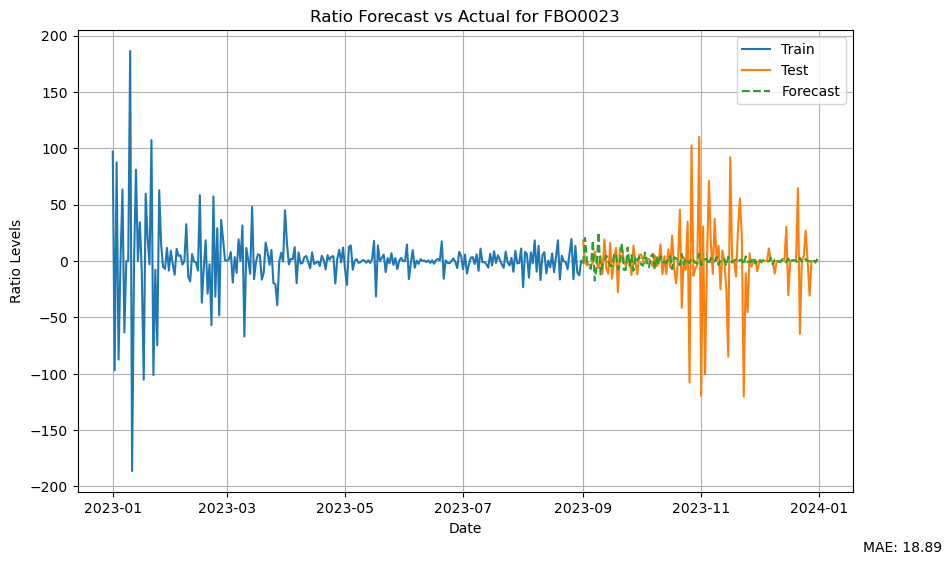

Processing FSK0003 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0003
Mean Absolute Error (MAE): 10.02
Plot saved to Plots_VARMAX/forecast_plot_FSK0003.png


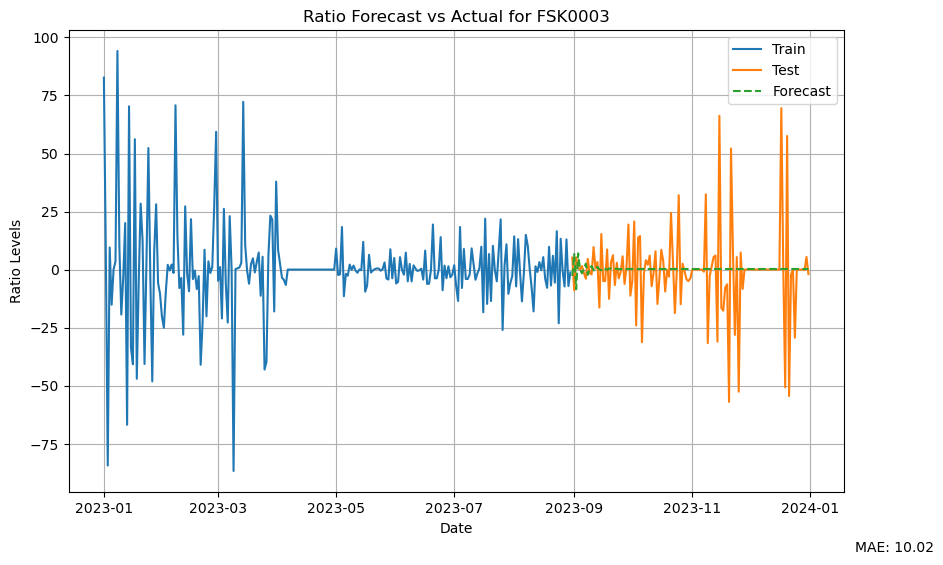

Processing FSK0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0005
Mean Absolute Error (MAE): 15.79
Plot saved to Plots_VARMAX/forecast_plot_FSK0005.png


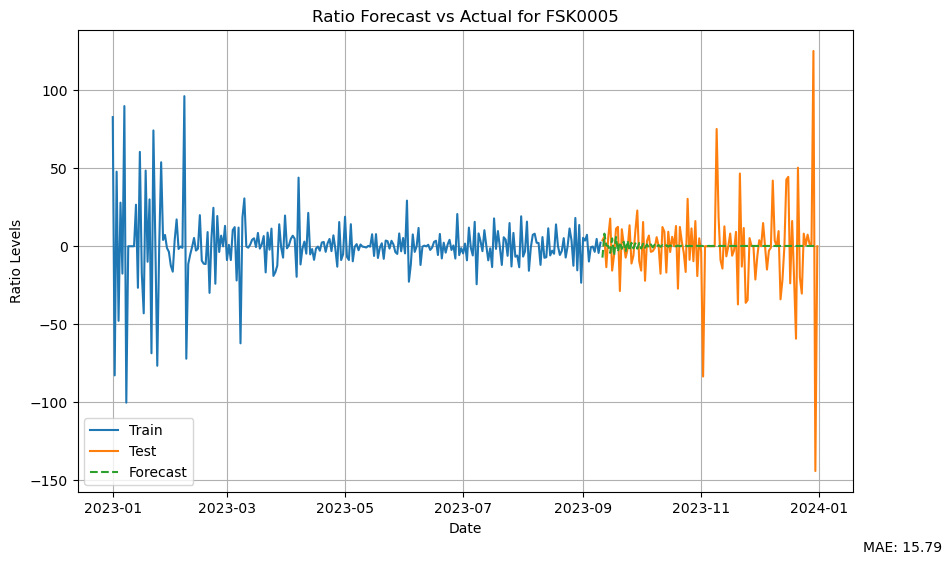

Processing FSK0006 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0006
Mean Absolute Error (MAE): 37.9
Plot saved to Plots_VARMAX/forecast_plot_FSK0006.png


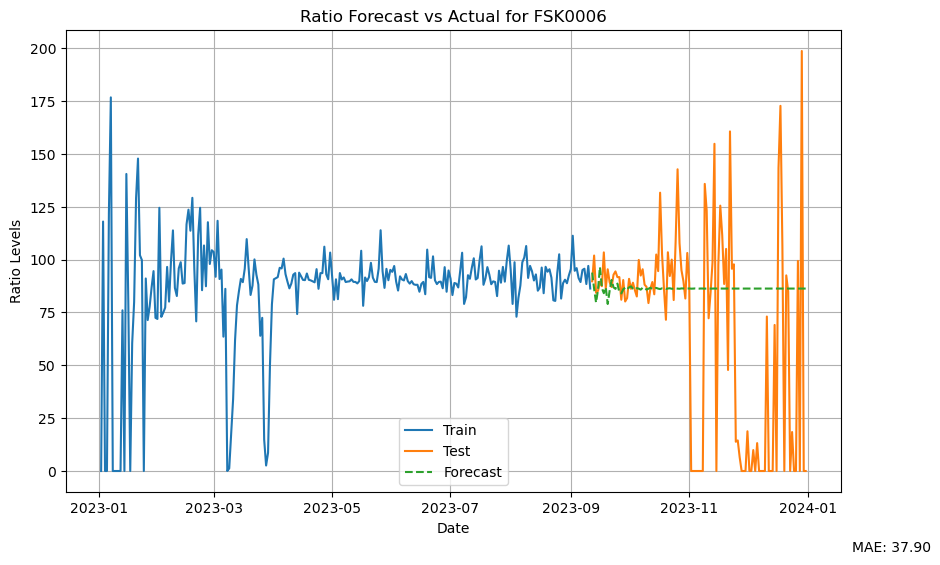

Processing FSK0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0007
Mean Absolute Error (MAE): 14.91
Plot saved to Plots_VARMAX/forecast_plot_FSK0007.png


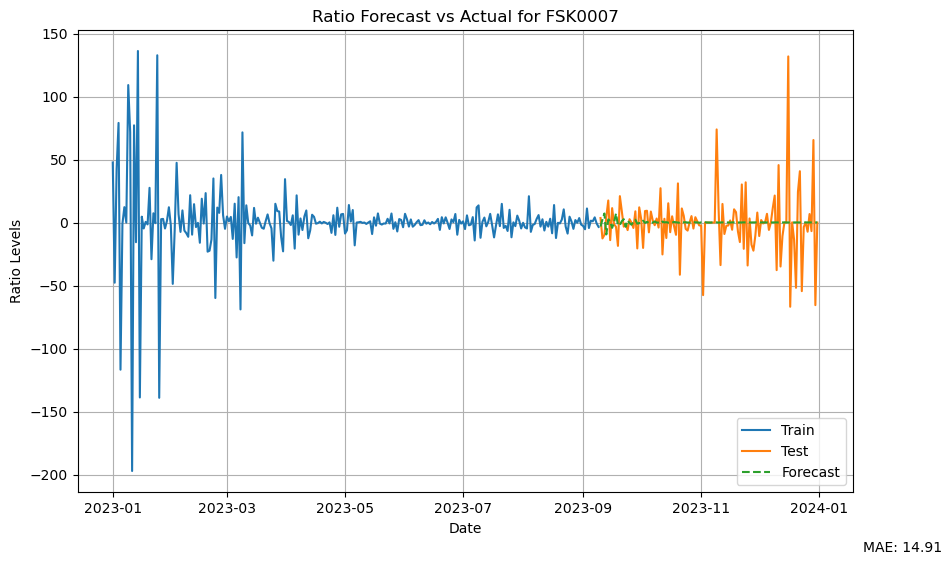

Processing FSK0008 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0008
Mean Absolute Error (MAE): 51.25
Plot saved to Plots_VARMAX/forecast_plot_FSK0008.png


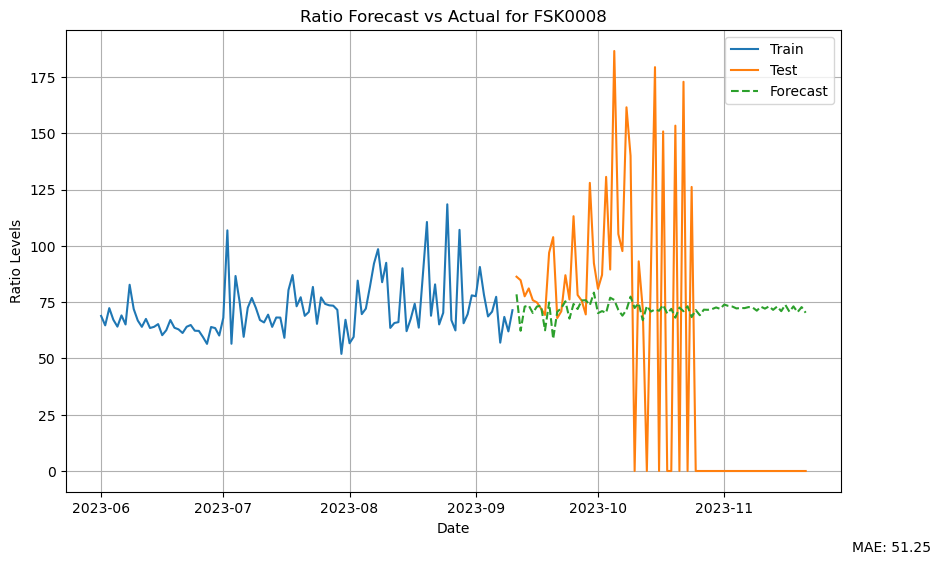

Processing MIC0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for MIC0001
Mean Absolute Error (MAE): 13.27
Plot saved to Plots_VARMAX/forecast_plot_MIC0001.png


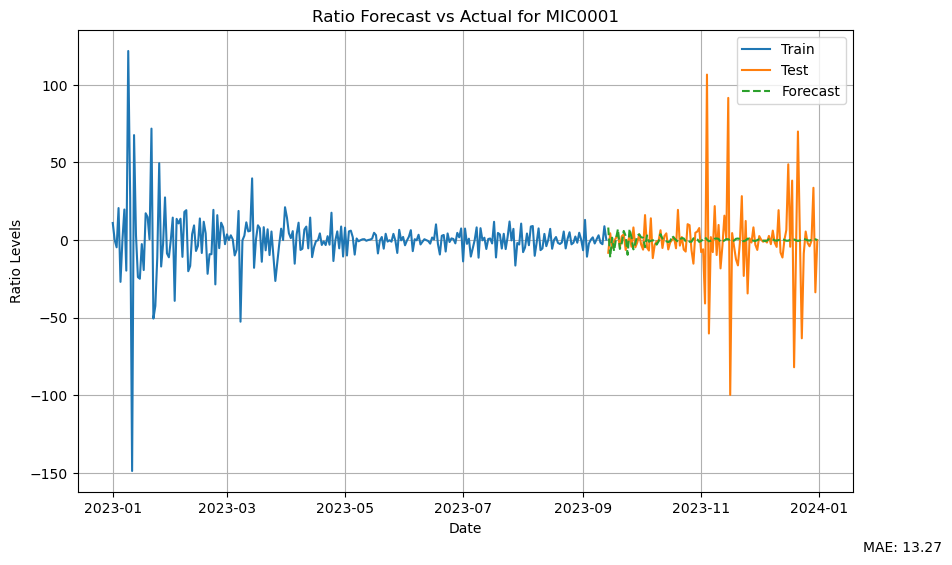

Processing SBO0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0001
Mean Absolute Error (MAE): 12.3
Plot saved to Plots_VARMAX/forecast_plot_SBO0001.png


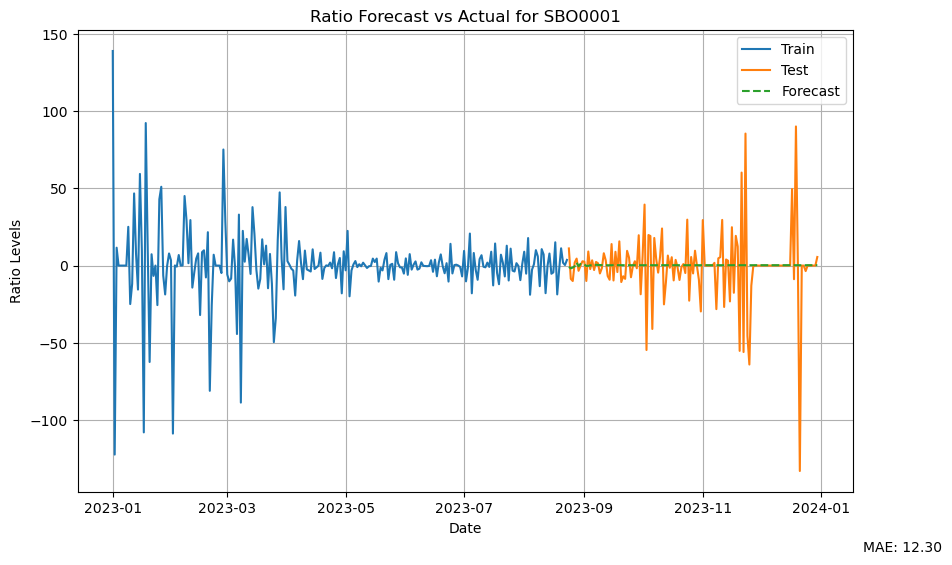

Processing SBO0002 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0002
Mean Absolute Error (MAE): 12.37
Plot saved to Plots_VARMAX/forecast_plot_SBO0002.png


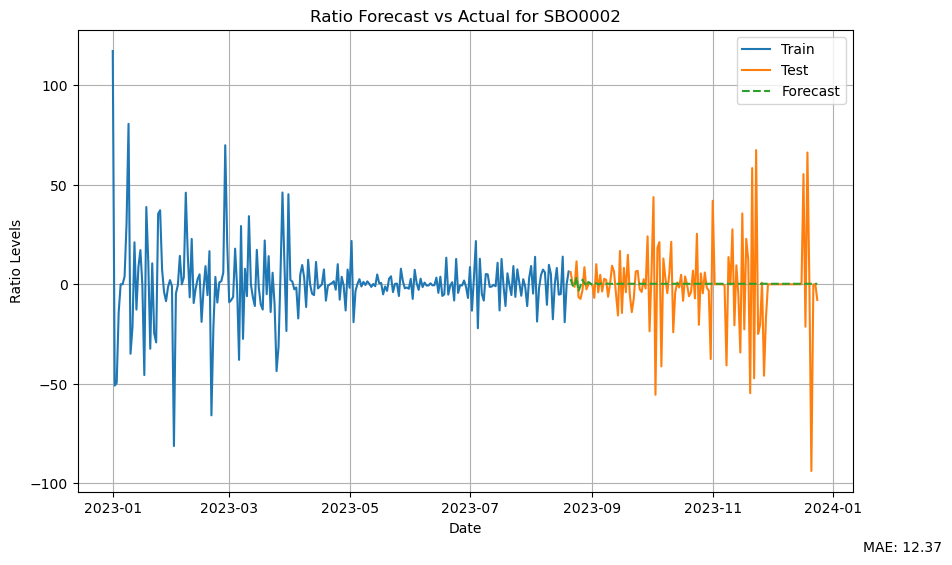

Processing SBO0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0005
Mean Absolute Error (MAE): 32.6
Plot saved to Plots_VARMAX/forecast_plot_SBO0005.png


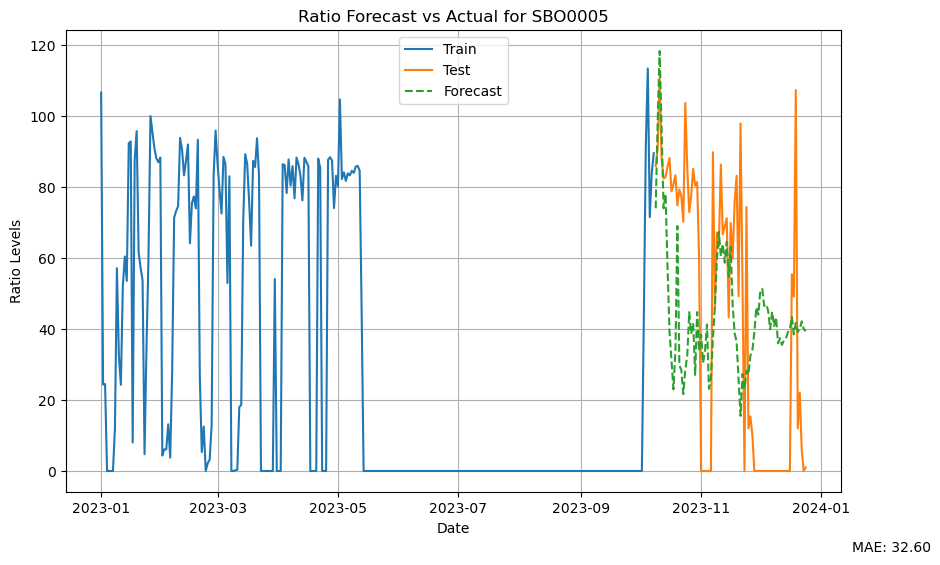

Processing SBO0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0007
Mean Absolute Error (MAE): 30.06
Plot saved to Plots_VARMAX/forecast_plot_SBO0007.png


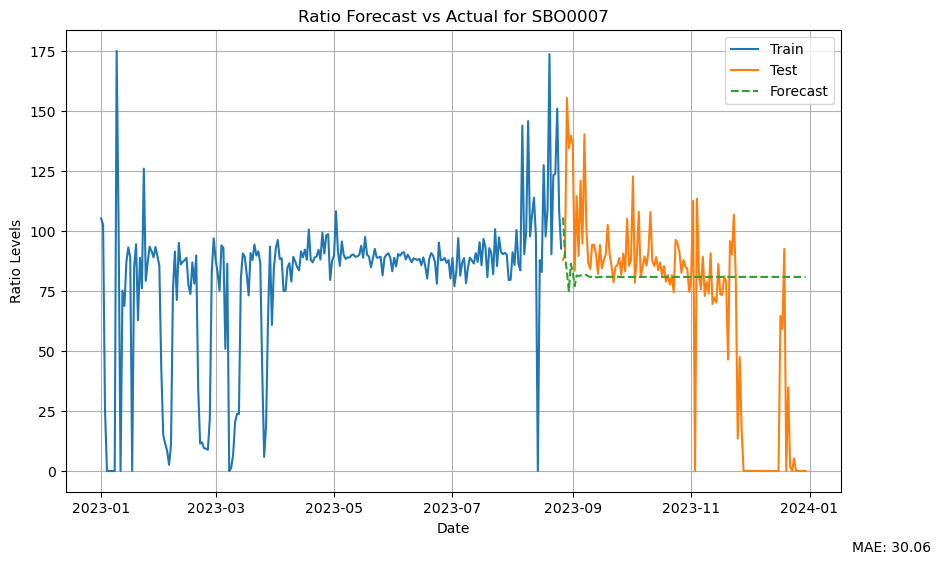

Processing SBO0011 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0011
Mean Absolute Error (MAE): 11.96
Plot saved to Plots_VARMAX/forecast_plot_SBO0011.png


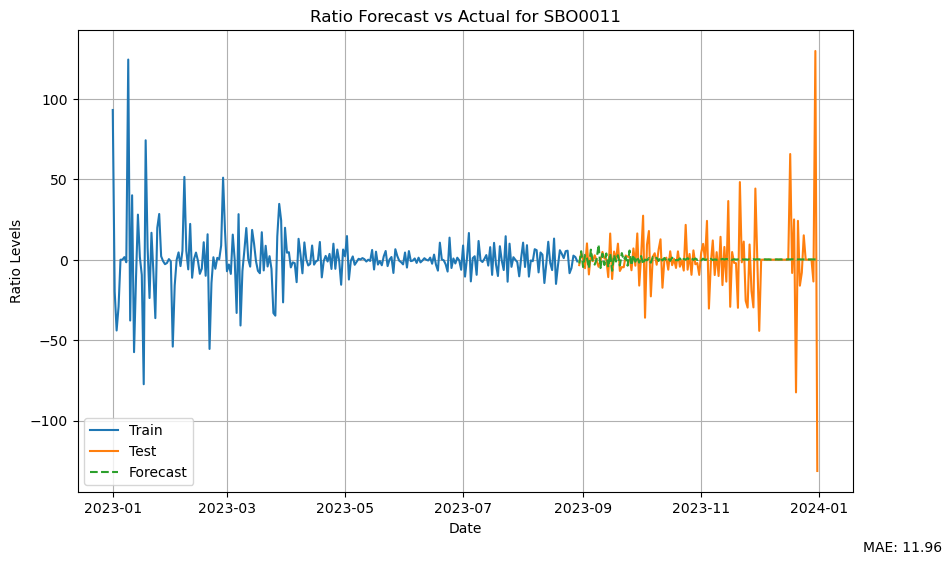

Processing SBO0012 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0012
Mean Absolute Error (MAE): 37.26
Plot saved to Plots_VARMAX/forecast_plot_SBO0012.png


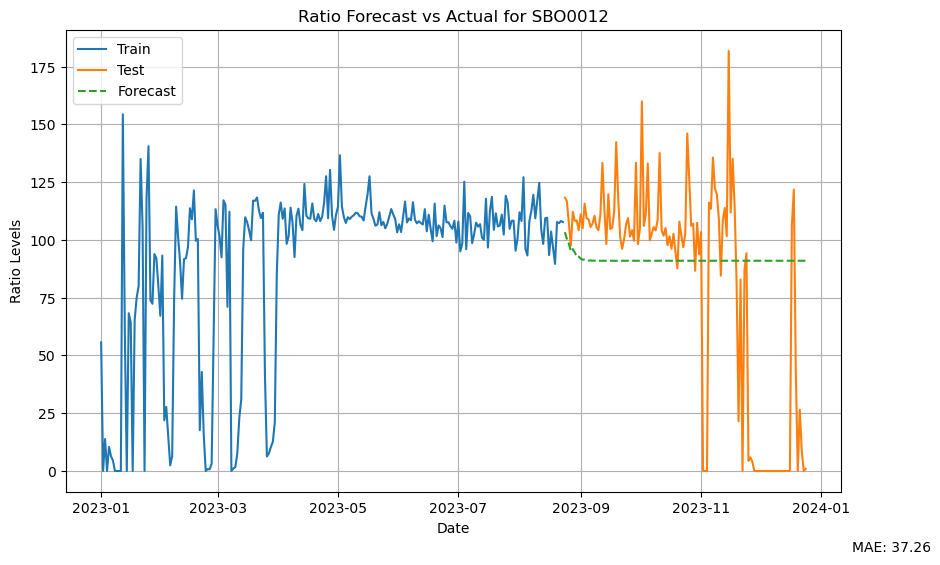

Processing SBO0013 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0013
Mean Absolute Error (MAE): 11.16
Plot saved to Plots_VARMAX/forecast_plot_SBO0013.png


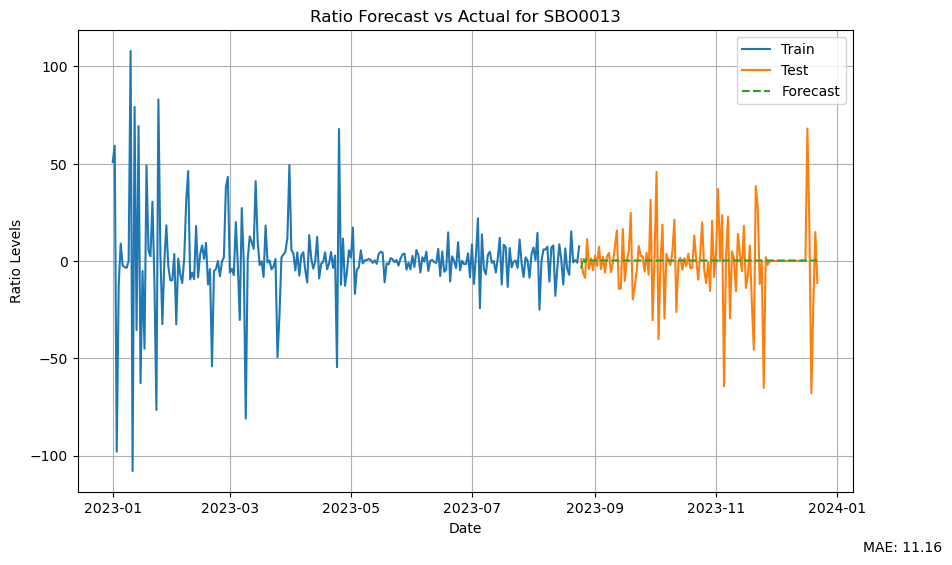

Processing SBO0014 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0014
Mean Absolute Error (MAE): 22.31
Plot saved to Plots_VARMAX/forecast_plot_SBO0014.png


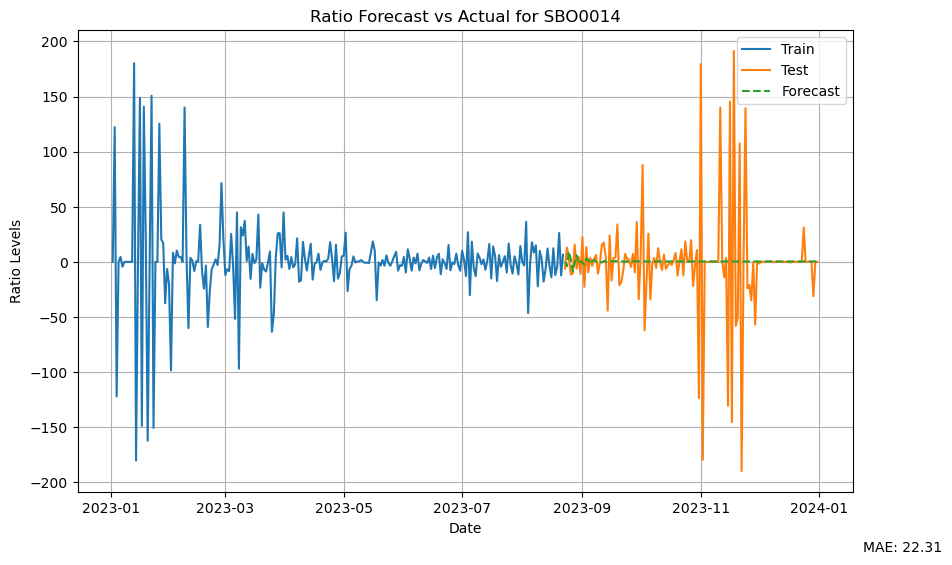

Processing SBO0015 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0015
Mean Absolute Error (MAE): 10.3
Plot saved to Plots_VARMAX/forecast_plot_SBO0015.png


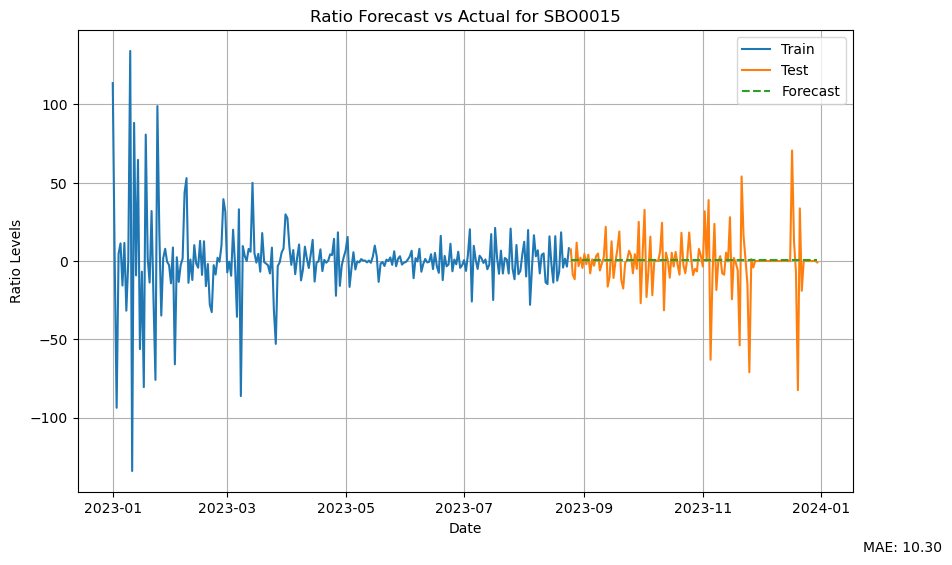

Processing SBO0016 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0016
Mean Absolute Error (MAE): 46.93
Plot saved to Plots_VARMAX/forecast_plot_SBO0016.png


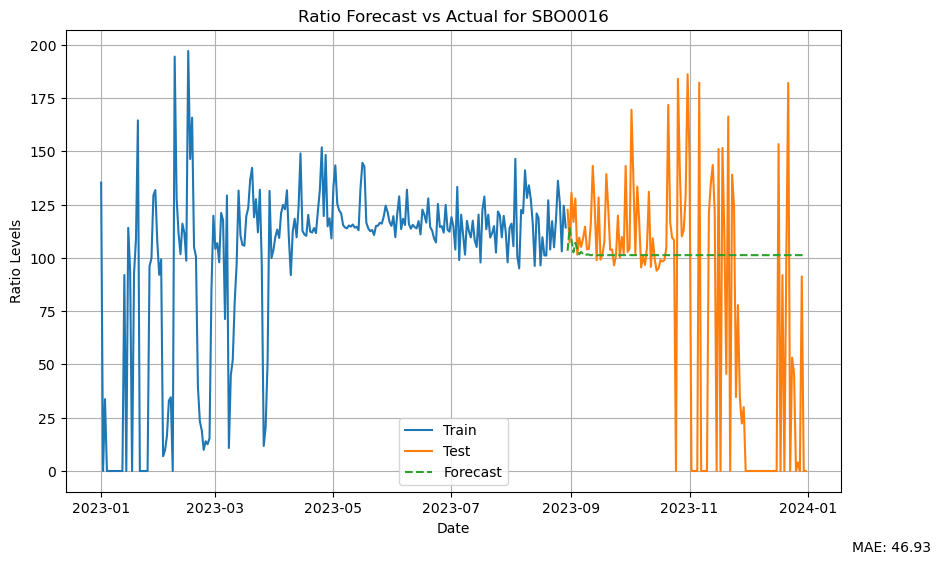

Processing SBO0017 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0017
Mean Absolute Error (MAE): 17.53
Plot saved to Plots_VARMAX/forecast_plot_SBO0017.png


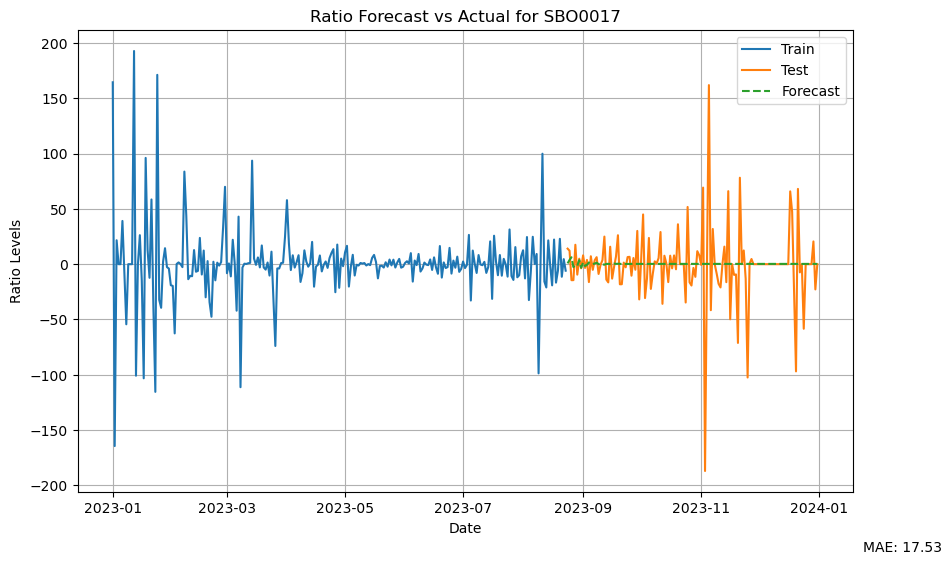

Processing SBO0028 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0028
Mean Absolute Error (MAE): 34.89
Plot saved to Plots_VARMAX/forecast_plot_SBO0028.png


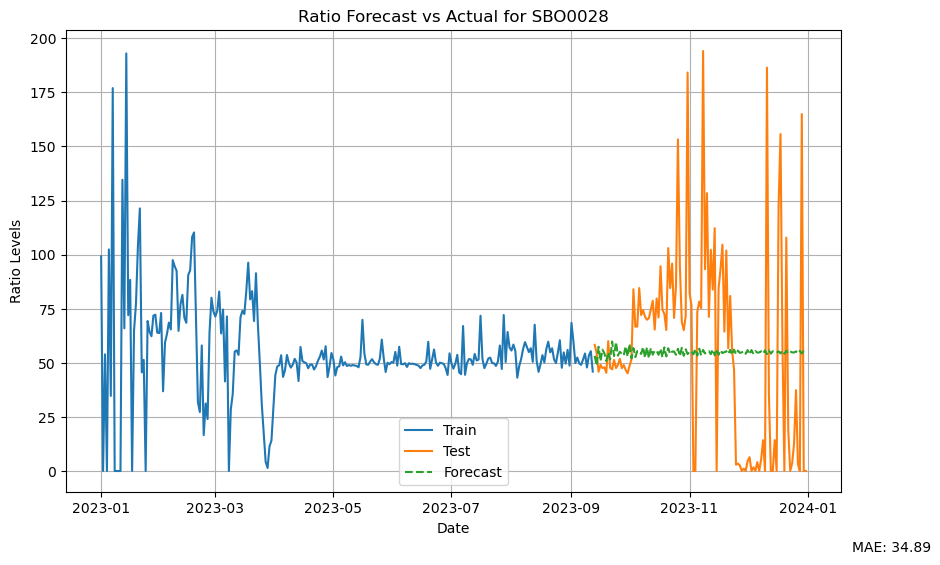

Processing SBO0030 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0030
Mean Absolute Error (MAE): 41.65
Plot saved to Plots_VARMAX/forecast_plot_SBO0030.png


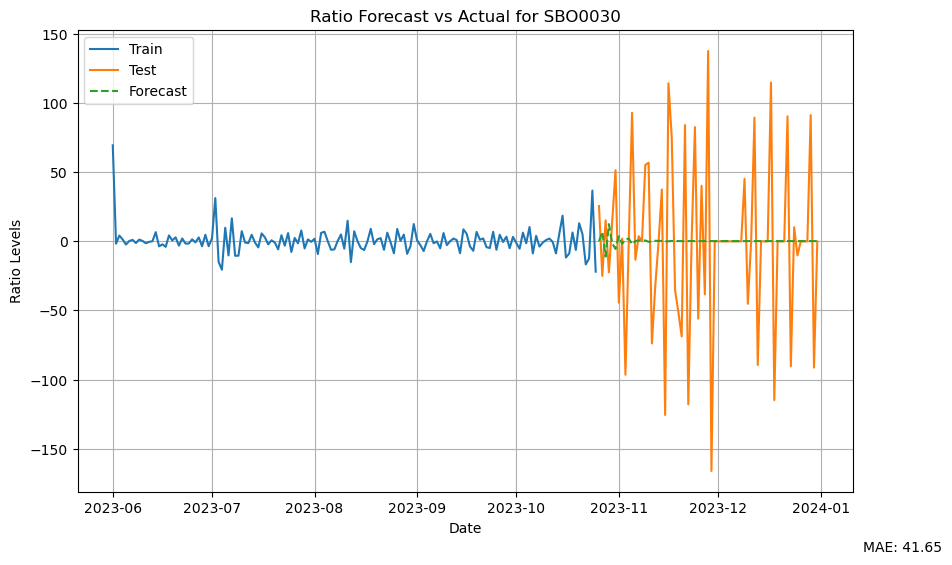

Processing SGA0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SGA0001
Mean Absolute Error (MAE): 31.78
Plot saved to Plots_VARMAX/forecast_plot_SGA0001.png


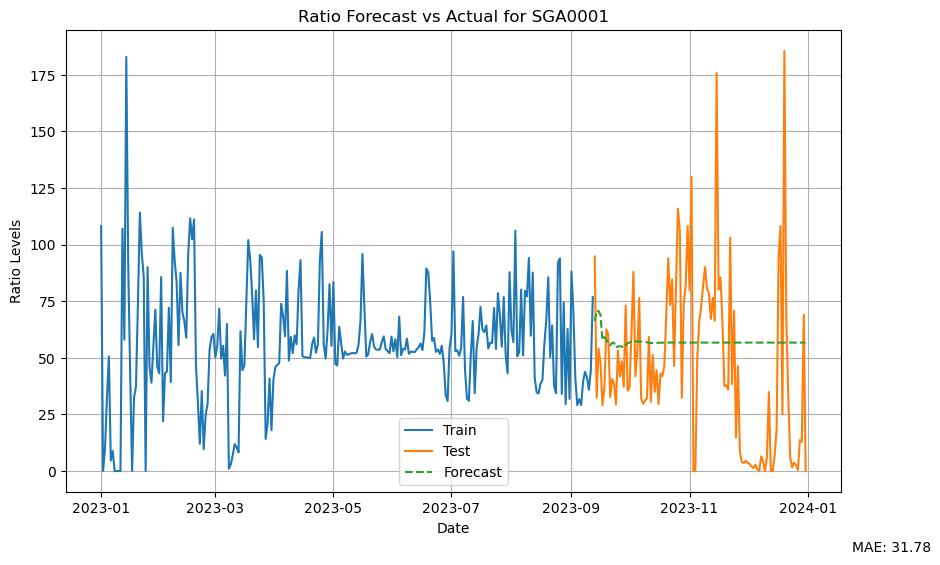

In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

test_data_dict = {
    "FBO0023": test_fbo0023,
    "FSK0003": test_fsk0003,
    "FSK0005": test_fsk0005,
    "FSK0006": test_fsk0006,
    "FSK0007": test_fsk0007,
    "FSK0008": test_fsk0008,
    "MIC0001": test_mic0001,
    "SBO0001": test_sbo0001,
    "SBO0002": test_sbo0002,
    "SBO0005": test_sbo0005,
    "SBO0007": test_sbo0007,
    "SBO0011": test_sbo0011,
    "SBO0012": test_sbo0012,
    "SBO0013": test_sbo0013,
    "SBO0014": test_sbo0014,
    "SBO0015": test_sbo0015,
    "SBO0016": test_sbo0016,
    "SBO0017": test_sbo0017,
    "SBO0028": test_sbo0028,
    "SBO0030": test_sbo0030,
    "SGA0001": test_sga0001
}

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}

data = {'Key': [], 'MAE': []}
metrics_df = pd.DataFrame(data)


# Directory setup for saving plots
var_save_dir = "Plots_VARMAX"
os.makedirs(var_save_dir, exist_ok=True)

arima_save_dir = "Plots_ARIMA"
os.makedirs(arima_save_dir, exist_ok=True)

def makemodel(df, lag):
    """
    Fit a VARMAX model given dataframe and lag order.
    """
    try:
        model_var = VARMAX(df, order=(lag, 0), enforce_stationarity=True)
        fitted_model_var = model_var.fit(disp=False)
        return fitted_model_var
    except Exception as e:
        print(f"An error occurred while fitting the model: {e}")
        return None

def forecast_models(data_frames_train, data_frames_test, best_lags):
    """
    Process each key in training data, fit model, and forecast based on the test data.
    """
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key} with data types:\n{df_train.dtypes}")
        lag = best_lags.get(key, 1)  # Default to lag 1 if not specified
        df_train = df_train.drop(["PlantKey"], axis=1, errors='ignore')
        model = makemodel(df_train, lag)
        if model and key in data_frames_test:
            df_test = data_frames_test[key]
            print(f"Forecasting test data for {key}")
            forecast = model.get_forecast(steps=len(df_test))
            forecasts[key] = forecast.summary_frame()
            plot_forecast(df_train['Ratio'], df_test['Ratio'], forecast.summary_frame()['mean'], key, var_save_dir)
    return forecasts

def plot_forecast(train, test, forecast, key, save_dir, show=True, save=True):
    """
    Plot training, test, and forecast data for visual analysis, save and/or show the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {key}')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')
    

    if save:
        save_path = f'{save_dir}/forecast_plot_{key}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")
        metrics_df.loc[len(metrics_df)] = [key, MAE]





    if show:
        plt.show()
        

# Define lags for VARMAX modeling
forecast_results = forecast_models(train_data_dict, test_data_dict, best_lags)
df.to_excel('output.xlsx', index=False, engine='openpyxl')
metrics_df.to_excel('forecast_metrics.xlsx', index=False, engine='openpyxl')


In [ ]:
import pandas as pd

# Data
data = {
    "KEY": [
        "fbo0023", "fsk0003", "fsk0005",
        "fsk0006", "fsk0007", "fsk0008",
        "mic0001", "sbo0001", "sbo0002",
        "sbo0005", "sbo0007", "sbo0011",
        "sbo0012", "sbo0013", "sbo0014",
        "sbo0015", "sbo0016", "sbo0017",
        "sbo0028", "sbo0030", "sga0001"
    ],
    "MAE": [
        8.98, 6.37, 6.5, 8.86, 6.43, 22.34, 5.1, 10.89, 7.85, 41.8, 13.8, 4.31, 12.71,
        7.85, 16.57, 8.58, 15.71, 19.68, 10.88, 9.52, 20.28
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_file = "Arima_metrics.xlsx"
df.to_excel(output_file, index=False, engine='openpyxl')

output_file


In [21]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)


NameError: name 'train_fbo0023_var' is not defined

In [ ]:
train_mic0001

In [ ]:
print(train_fbo0023_var)

In [22]:
# Check for stationarity and difference if necessary
def check_stationarity(ts):
    result = adfuller(ts, autolag='AIC')
    if result[1] < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')

# Apply to all series
#for col in train_fbo0023_var.columns:
check_stationarity(combined_train["SunRad"])
check_stationarity(combined_train["Temperature"])

print(train_fbo0023_var)

#combined_train, combined_test
#train_fbo0023.dtypes

Series is stationary
Series is stationary


NameError: name 'train_fbo0023_var' is not defined

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(combined_train[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0023  , p=0.9616  , df_denom=251, df_num=1
ssr based chi2 test:   chi2=0.0024  , p=0.9613  , df=1
likelihood ratio test: chi2=0.0024  , p=0.9613  , df=1
parameter F test:         F=0.0023  , p=0.9616  , df_denom=251, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1314  , p=0.8769  , df_denom=248, df_num=2
ssr based chi2 test:   chi2=0.2681  , p=0.8745  , df=2
likelihood ratio test: chi2=0.2680  , p=0.8746  , df=2
parameter F test:         F=0.1314  , p=0.8769  , df_denom=248, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4221  , p=0.2369  , df_denom=245, df_num=3
ssr based chi2 test:   chi2=4.3882  , p=0.2225  , df=3
likelihood ratio test: chi2=4.3504  , p=0.2260  , df=3
parameter F test:         F=1.4221  , p=0.2369  , df_denom=245, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9329  , p=0.1056  

In [24]:
model_COMB= VAR(combined_train)
sorted_order= model_COMB.select_order(maxlags= 20)
best_lag_COMB = sorted_order.aic

print(best_lag_COMB)

NameError: name 'VAR' is not defined

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR , VARMAX
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

#print(df.drop(["PlantKey"],axis=1))
#print(df)
#df =df.drop(["PlantKey"],axis=1)
#df =df.drop(["Temperature"],axis=1)



#gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)



model_combine = VARMAX(combined_train, order=(best_lag_COMB,0), enforce_stationarity= True)
fitted_model_combine = model_combine.fit(disp= False)
#print(fitted_model_combine.summary())


In [ ]:

start_forecast = combined_test.index[0]
end_forecast = combined_test.index[-1]
predictions = fitted_model_combine.get_prediction(start=start_forecast, end=end_forecast)
forecast_mean_VAR = predictions.predicted_mean
combined_train
forecast_mean_VAR

In [ ]:
train_fbo0023_var.dtypes


In [ ]:
print(forecast_mean_VAR["Ratio"])

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths
var_save_dir_mean = "Plots_VARMAX_mean"
os.makedirs(var_save_dir_mean, exist_ok=True)


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(combined_train.index, combined_train["Ratio"], label='Train')
plt.plot(combined_test.index, combined_test["Ratio"], label='Test')
plt.plot(forecast_mean_VAR.index, forecast_mean_VAR["Ratio"], label='Forecast')
plt.title('Mean Var vs Actual')
plt.xlabel('Date')
plt.ylabel('Pr')
plt.legend()

# Calculate Mean Absolute Error (MAE)
MAE = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

# Specify the path and filename for saving the plot
key = 'some_identifier'  # Replace with the actual identifier or variable as needed
save_path = f'{var_save_dir_mean}/forecast_plot_{key}.png'

# Print the save path to confirm where the file is saved
print(f"Plot saved to: {save_path}")

# Save the plot
plt.savefig(save_path, format='png', dpi=300)

# Display the plot
plt.show()

# Print MAE for confirmation
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))


In [ ]:
#print(train_fbo0023_var)
print(test_fbo0023_var)

In [ ]:
# Calculate daily absolute errors
daily_errors = np.abs(forecast_fbo0023_var['Ratio'] - test_fbo0023_var['Ratio'])
#print(forecast_fbo0023)

print(daily_errors)


In [ ]:
#forecast_arima_mean.dtypes
ratio_test["Ratio"].dtypes

forecast_arima_mean.dtypes

In [ ]:
MAE_arima_mean = np.mean(abs(forecast_arima_mean - ratio_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_arima_mean, 2)))


MAE_arima_mean_absolute =mean_absolute_percentage_error( forecast_arima_mean, ratio_test["Ratio"])
print("MAPE:"+ str(np.round(MAE_arima_mean_absolute, 2)))

In [ ]:
MAE_test_fbo0023 = np.mean(abs(forecast - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_test_fbo0023, 2)))


MAE_arima_mean_absolute_fbo0023= mean_absolute_percentage_error(forecast, test_fbo0023_ratio)
print('MAPE ' + str(np.round(MAE_arima_mean_absolute_fbo0023, 2)))


In [ ]:
MAE_mean_VAR = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_mean_VAR, 2)))

MAE_mean_VAR_absolute = mean_absolute_percentage_error(forecast_mean_VAR["Ratio"] , combined_test["Ratio"])
print(MAE_mean_VAR_absolute)
print('MAPE ' + str(np.round(MAE_mean_VAR_absolute, 2)))


In [ ]:
MAE_forecast_fbo0023_VAR = np.mean(abs(forecast_fbo0023_var["Ratio"] - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_forecast_fbo0023_VAR, 2)))

MAE_forecast_fbo0023_VAR_Absolute= mean_absolute_percentage_error(forecast_fbo0023_var["Ratio"], test_fbo0023_ratio)
print('MAPE: ' + str(np.round(MAE_forecast_fbo0023_VAR_Absolute, 2)))

